#### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Installing library

In [ ]:
!pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.5 MB/s eta 0:00:00


#### Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#### Reading and Sorting the dataset(by date)

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/mensa_assignment/Forecasting Assignment.xlsx")
df['on_date'] = pd.to_datetime(df['on_date'])
df = df.sort_values(by = 'on_date')
df.reset_index(drop = True)

SKU_m    product category    on_date  quantity sold
0       SKU1490       Salad Servers 2022-05-26              4
1       SKU1775          Pot Holder 2022-05-26              1
2       SKU1776  Tooth Brush Holder 2022-05-26              6
3       SKU1777       Kitchen Towel 2022-05-26              2
4       SKU1778        Fruit Basket 2022-05-26              1
...         ...                 ...        ...            ...
121861  SKU1499       Kitchen Towel 2023-09-30              3
121862  SKU1497          Spoon Rest 2023-09-30             11
121863  SKU3847        Table Runner 2023-09-30              1
121864  SKU4056      Incense sticks 2023-09-30              2
121865  SKU2049       Kitchen Towel 2023-09-30              1

[121866 rows x 4 columns]

#### Creating SKU_WISE_DF

In [ ]:
skus_more_than_350 = []
all_skus = df['SKU_m'].unique().tolist()

In [ ]:
for i in all_skus:
    cur_sku_df = df[df['SKU_m'] == i]
    if len(cur_sku_df)>350:
        skus_more_than_350.append(i)

In [ ]:
sku_wise_df = df[df['SKU_m'].isin(skus_more_than_350)].reset_index(drop = True)

#### Creating  Category_WISE_DF

In [ ]:
category_more_than_3500 = []
all_categories = df['product category'].unique().tolist()

In [ ]:
for i in all_categories:
    cur_category_df = df[df['product category'] == i]
    if len(cur_category_df)>3500:
        category_more_than_3500.append(i)

In [ ]:
category_wise_df = df[df['product category'].isin(category_more_than_3500)].reset_index(drop = True)

In [ ]:
category_wise_df.shape

(75380, 4)

#### Outlier Detection at overall level

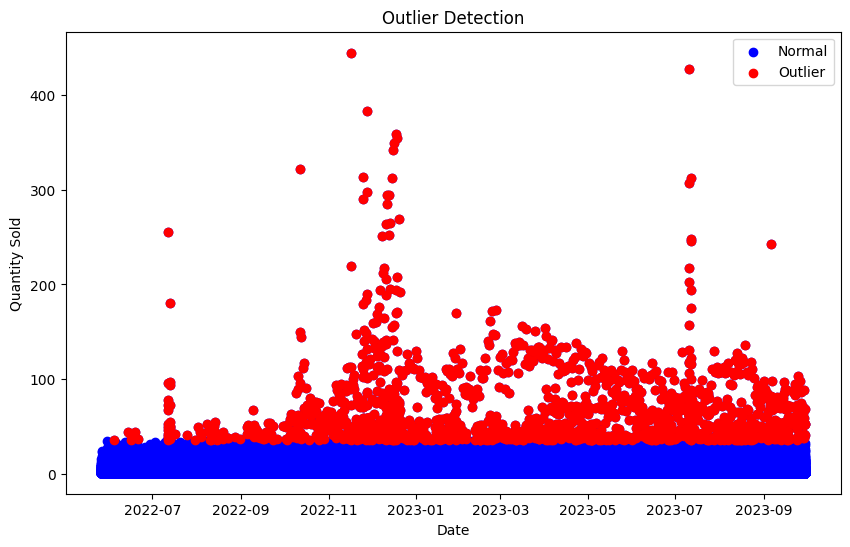

In [ ]:
# Detection
# Calculate z-score for each data point
df['z_score'] = (df['quantity sold'] - df['quantity sold'].mean()) / df['quantity sold'].std()

# Define threshold for outlier detection (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Identify outliers
outliers = df[(df['z_score'] > outlier_threshold) | (df['z_score'] < -outlier_threshold)]

# Visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['on_date'], df['quantity sold'], color='blue', label='Normal')
plt.scatter(outliers['on_date'], outliers['quantity sold'], color='red', label='Outlier')
plt.title('Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()


### Analysis

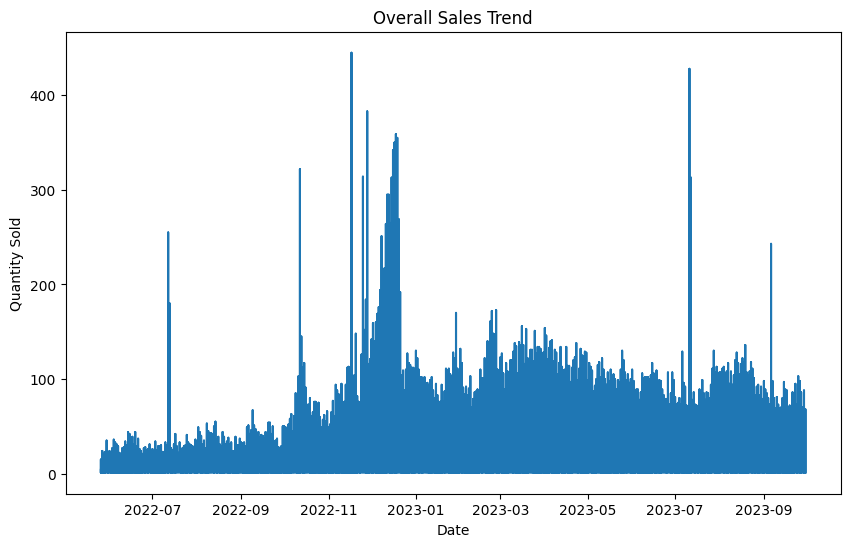

In [ ]:
# Visualize overall sales trend
plt.figure(figsize=(10, 6))
plt.plot(df['on_date'], df['quantity sold'])
plt.title('Overall Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

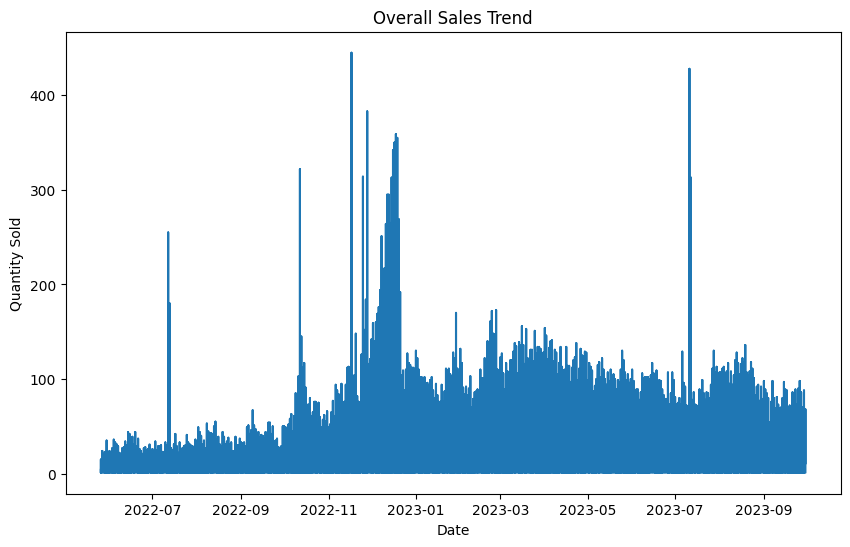

In [ ]:
# Visualize overall sales trend specific sku_wise
plt.figure(figsize=(10, 6))
plt.plot(sku_wise_df['on_date'], sku_wise_df['quantity sold'])
plt.title('Overall Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

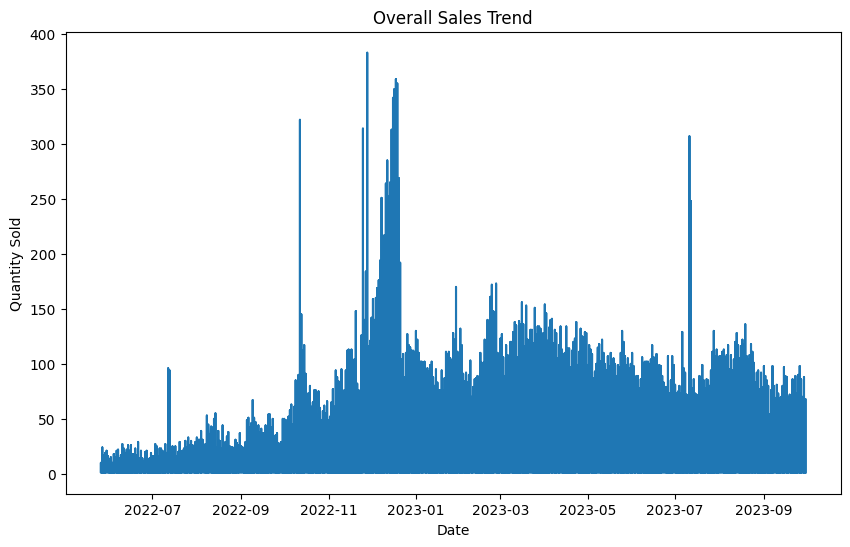

In [ ]:
# Visualize overall sales trend specific category_wise
plt.figure(figsize=(10, 6))
plt.plot(category_wise_df['on_date'], category_wise_df['quantity sold'])
plt.title('Overall Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

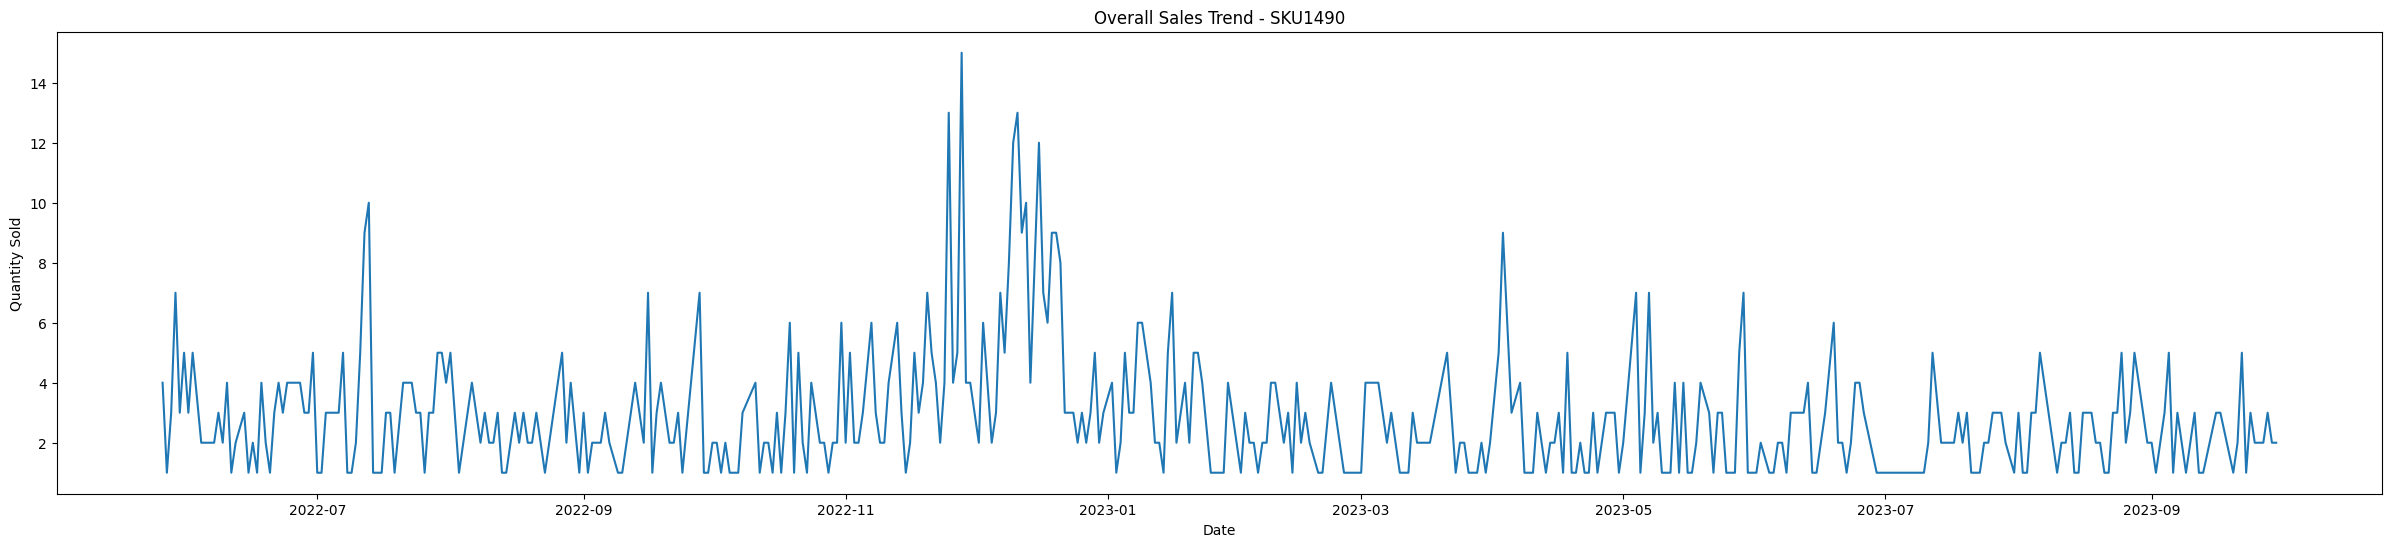

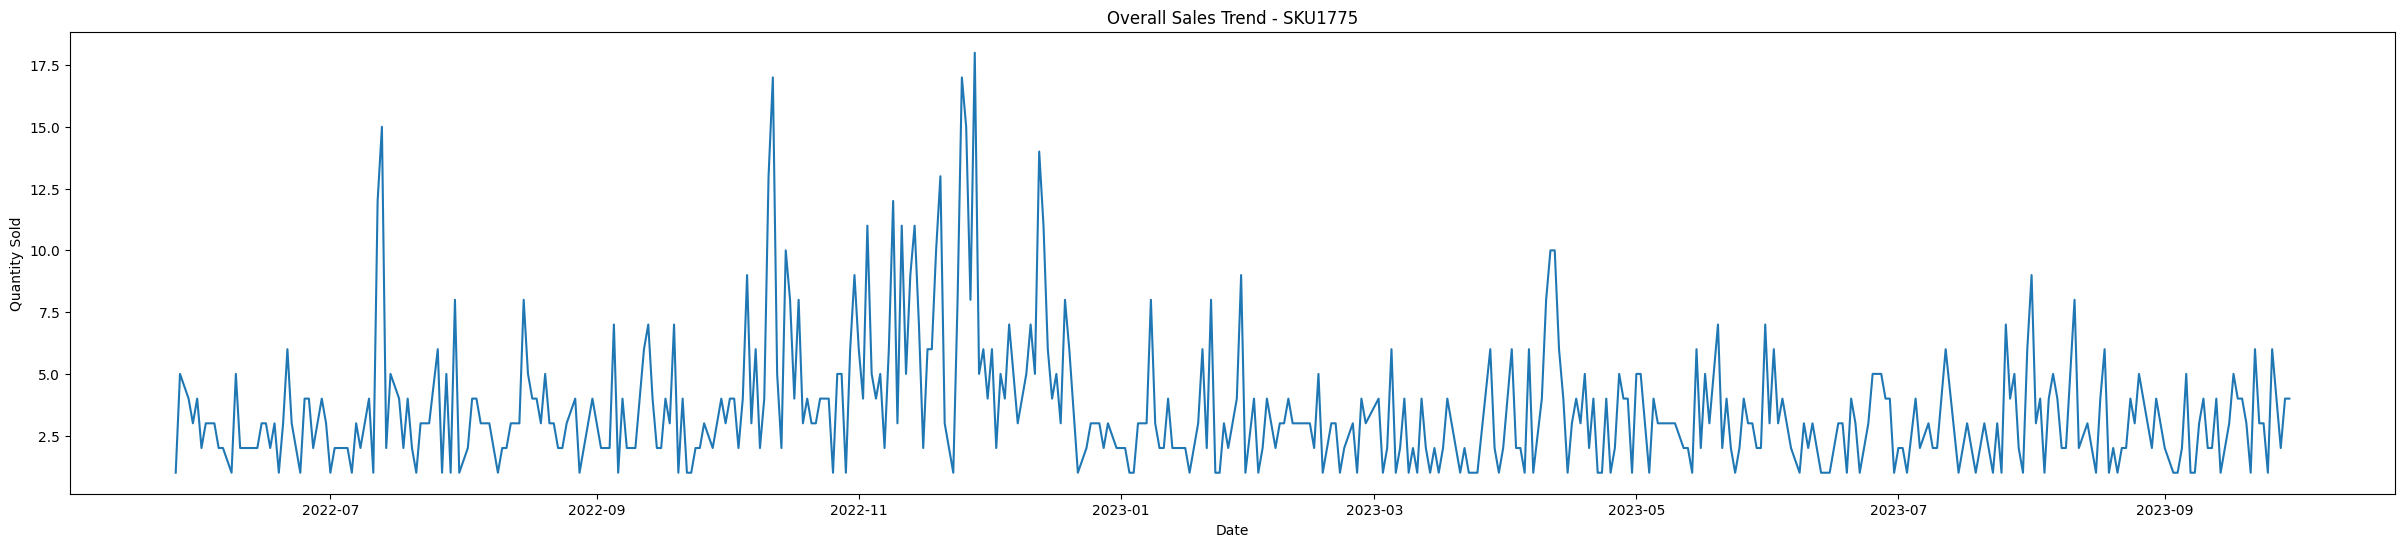

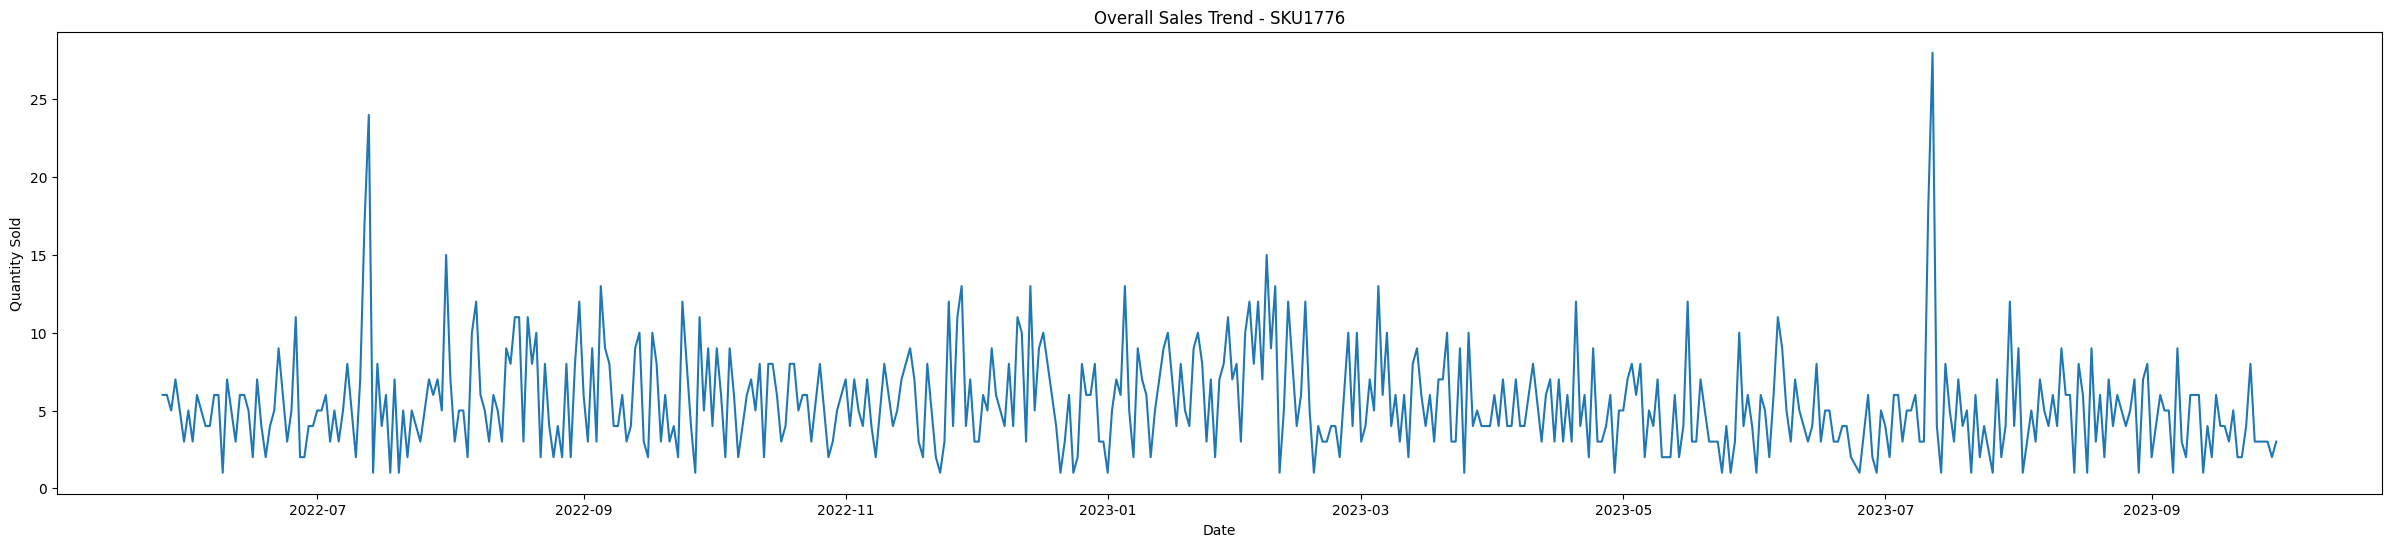

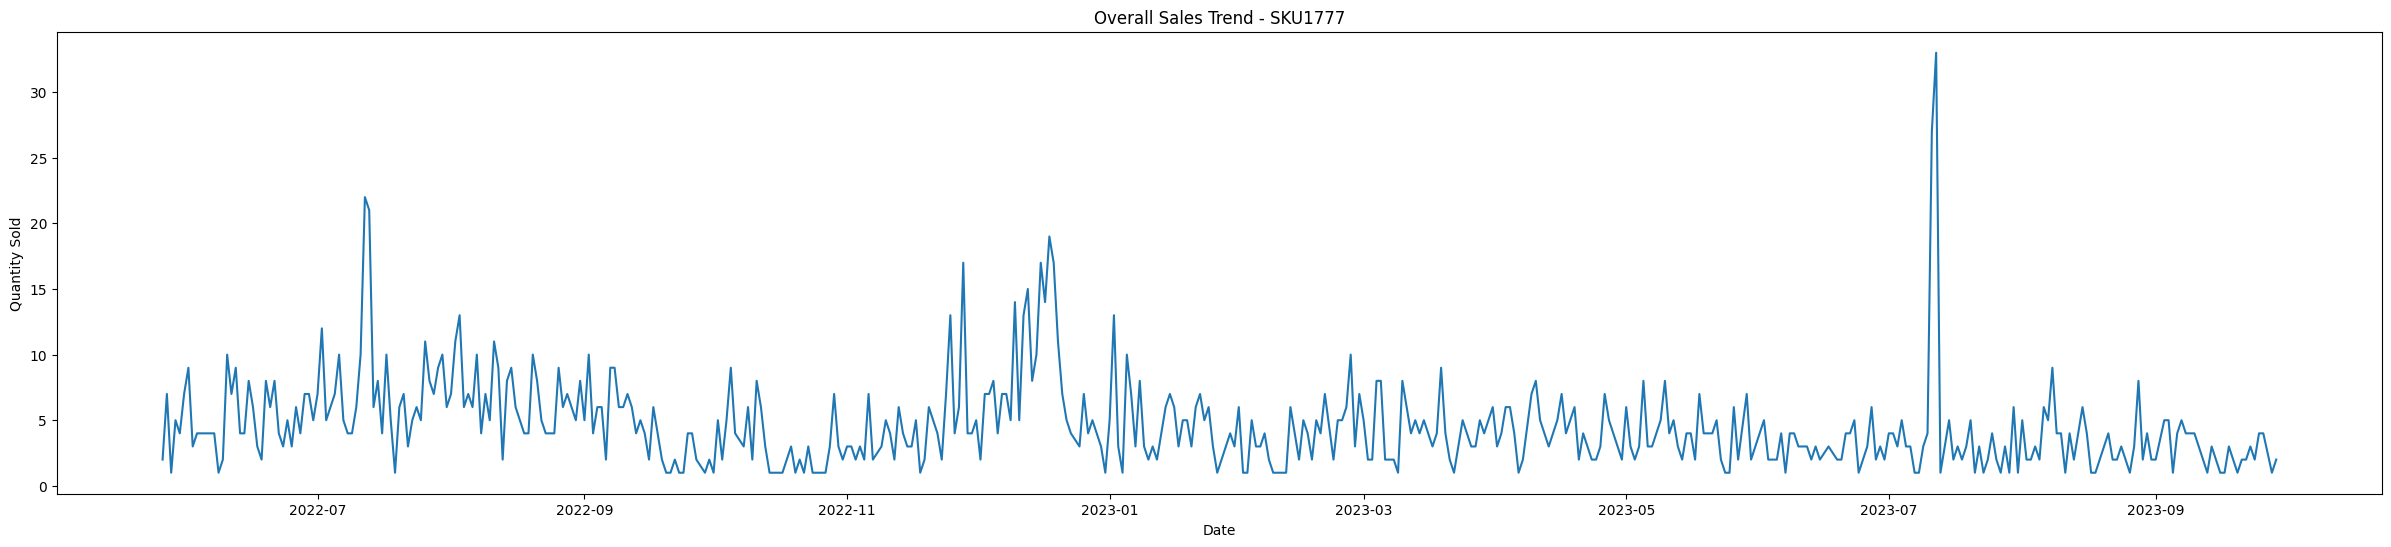

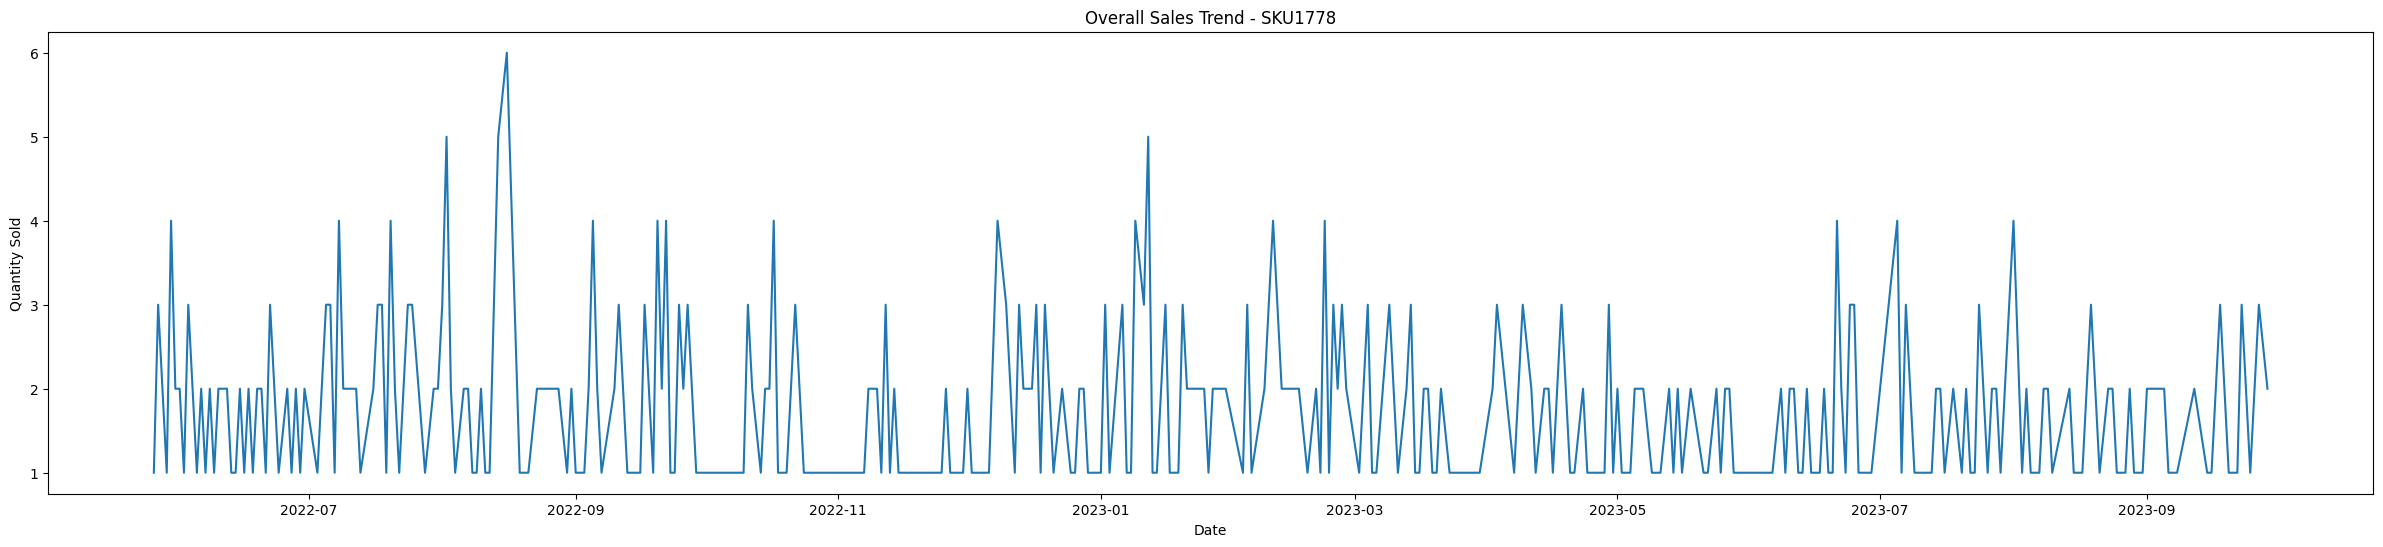

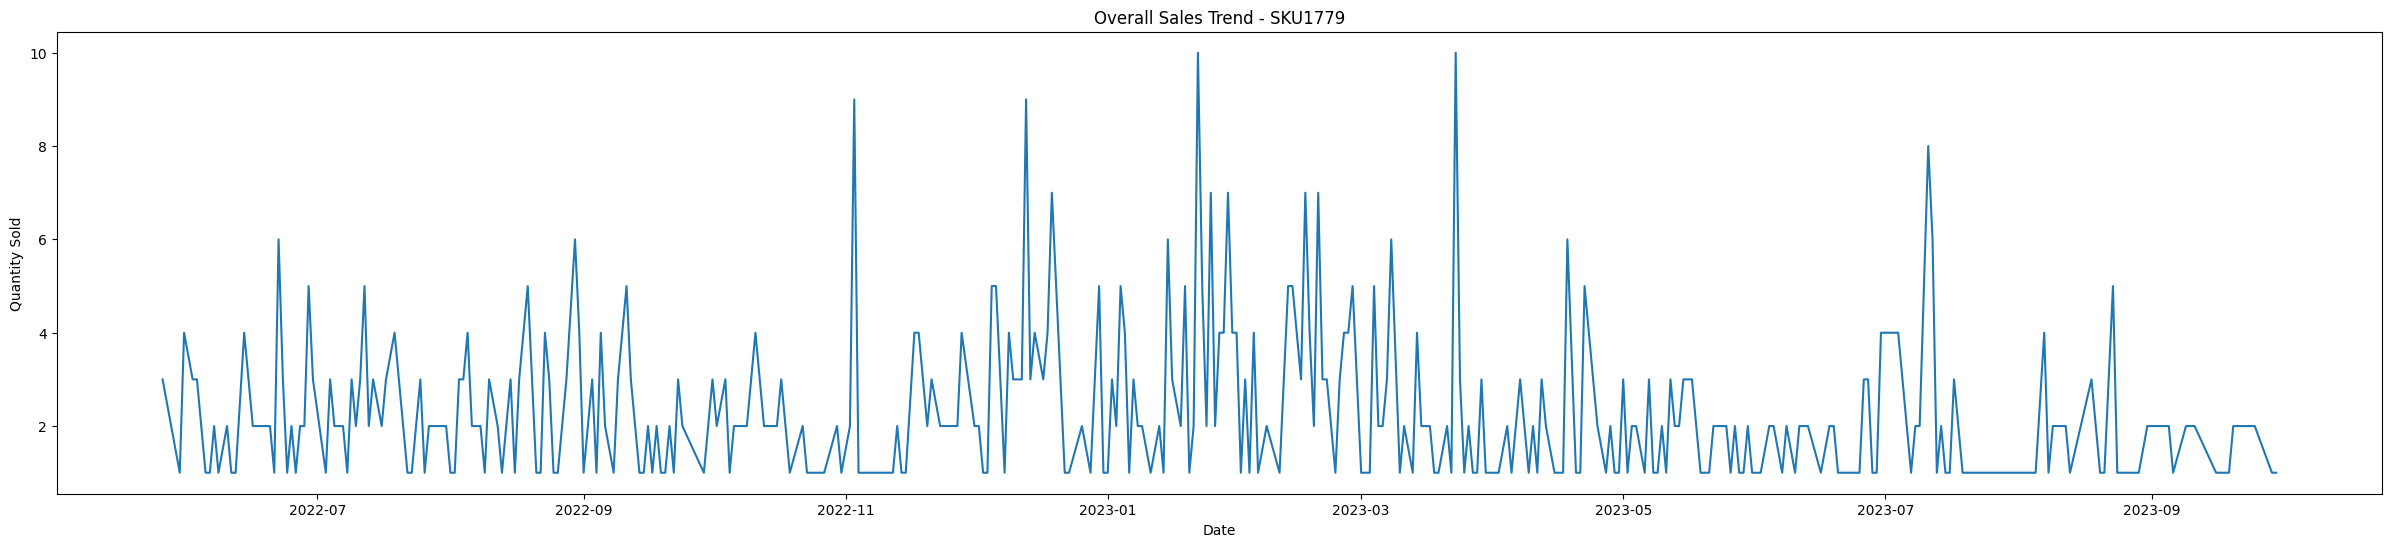

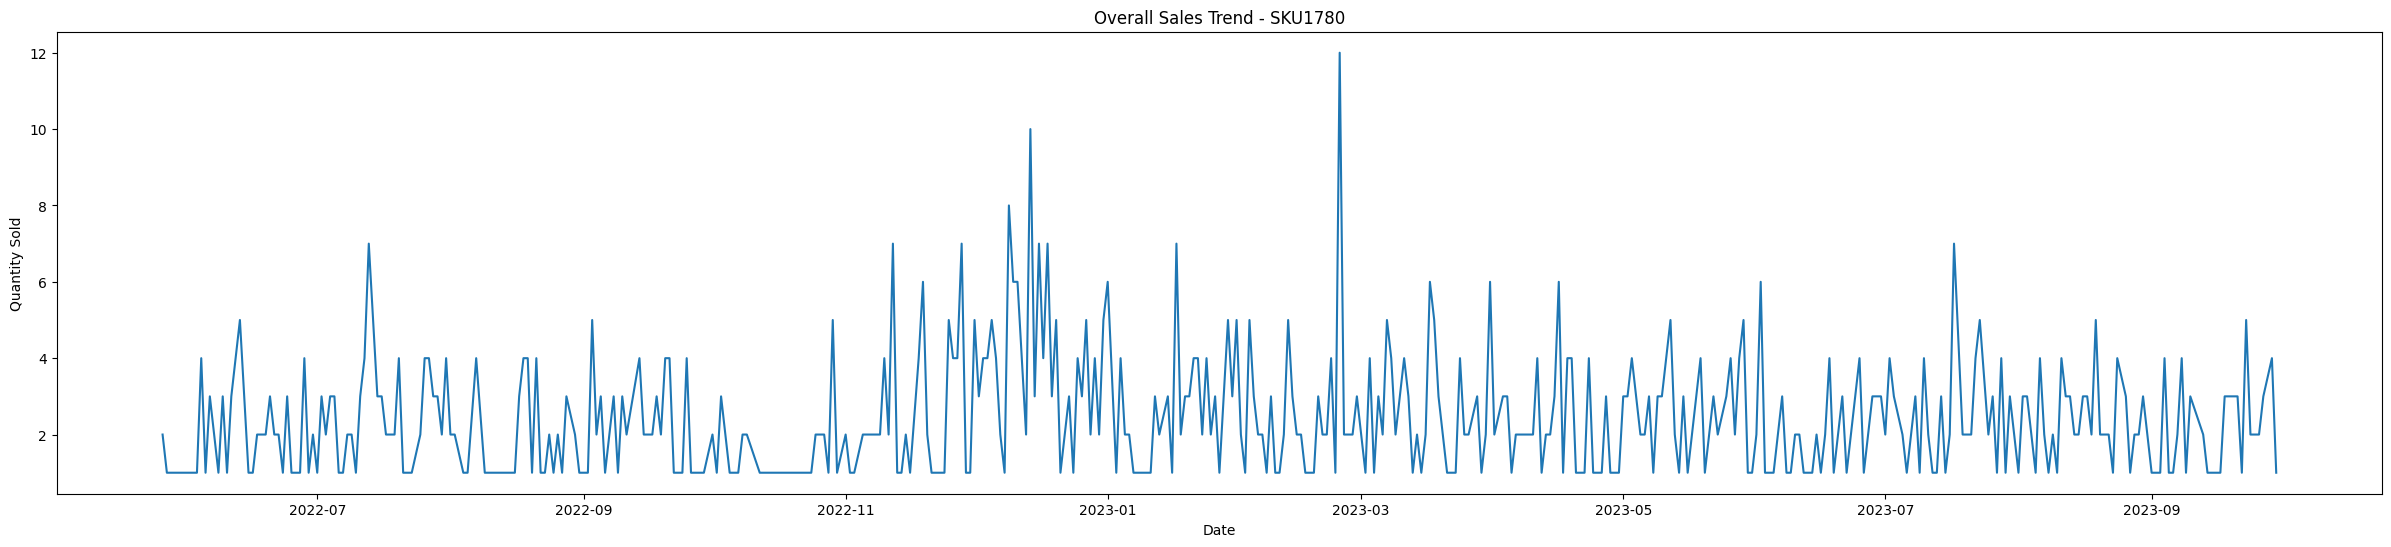

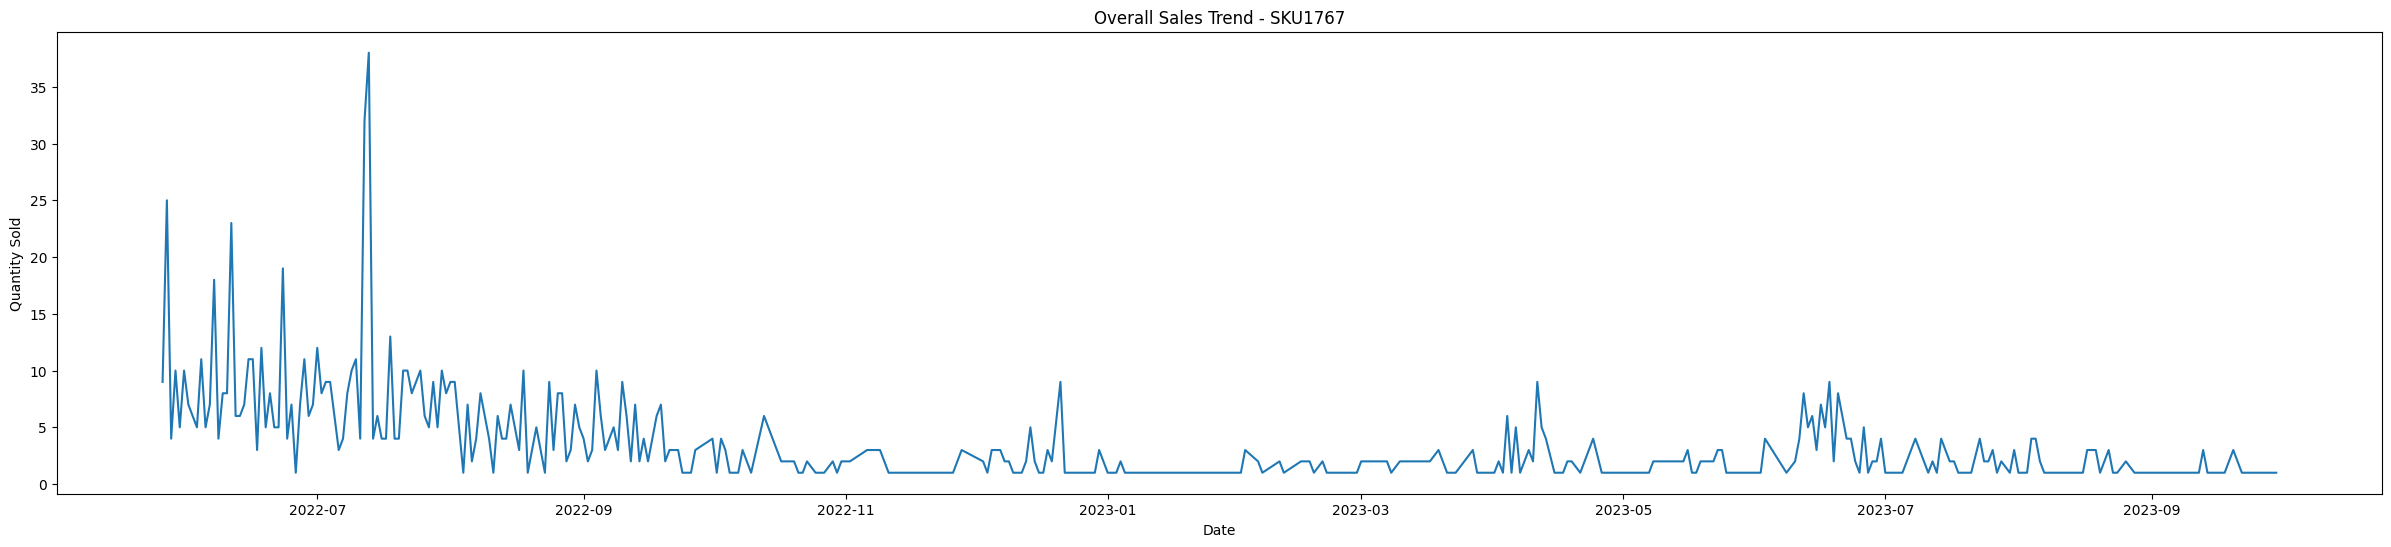

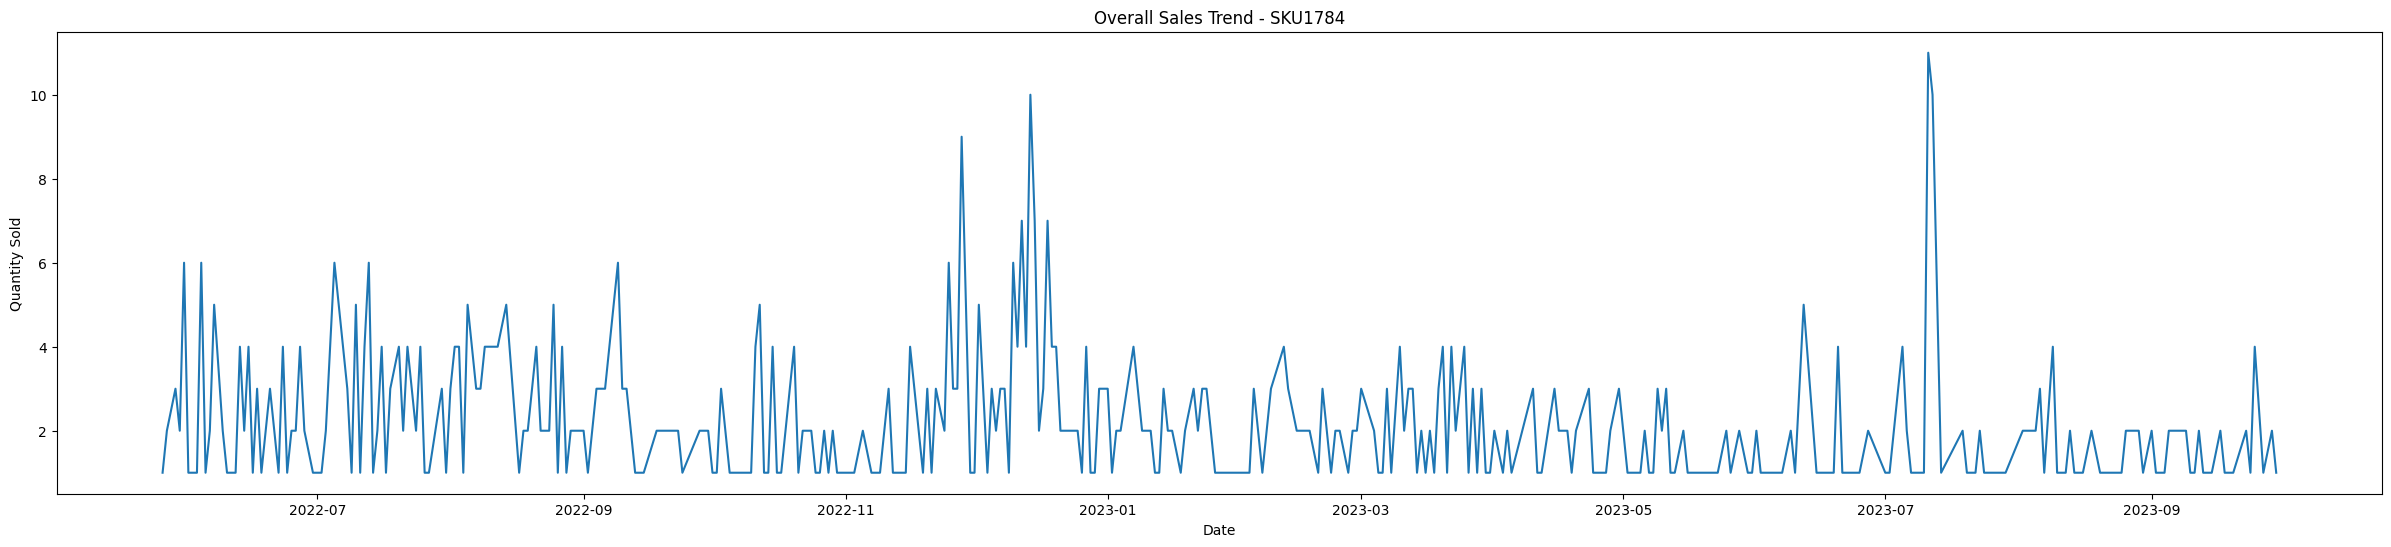

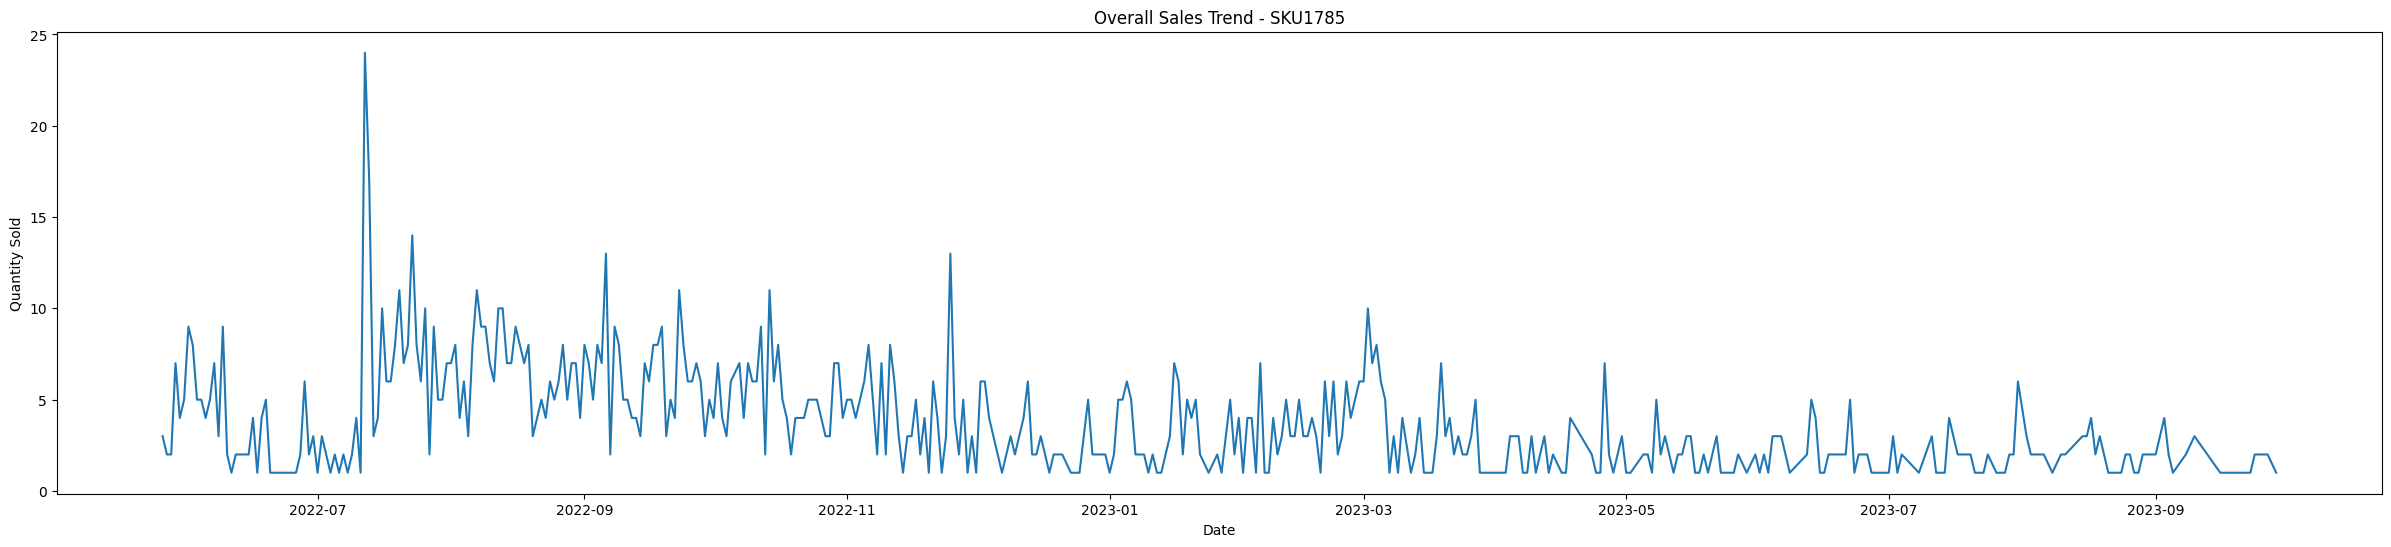

In [ ]:
### Plotting sku's sales quantity

c = 0
for i in sku_wise_df['SKU_m'].unique().tolist():
    cur_sku_wise_df_i = sku_wise_df[sku_wise_df['SKU_m'] == i]
    # Visualize sales trend for cur specific sku_wise
    cur_sku_wise_df_i  = pd.DataFrame(cur_sku_wise_df_i.groupby(["SKU_m","on_date"])['quantity sold'].sum()).reset_index()
    plt.figure(figsize=(30, 6))
    plt.plot(cur_sku_wise_df_i['on_date'], cur_sku_wise_df_i['quantity sold'])
    plt.title(f'Overall Sales Trend - {i}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.show()
    c+=1
    if c==10:
        break

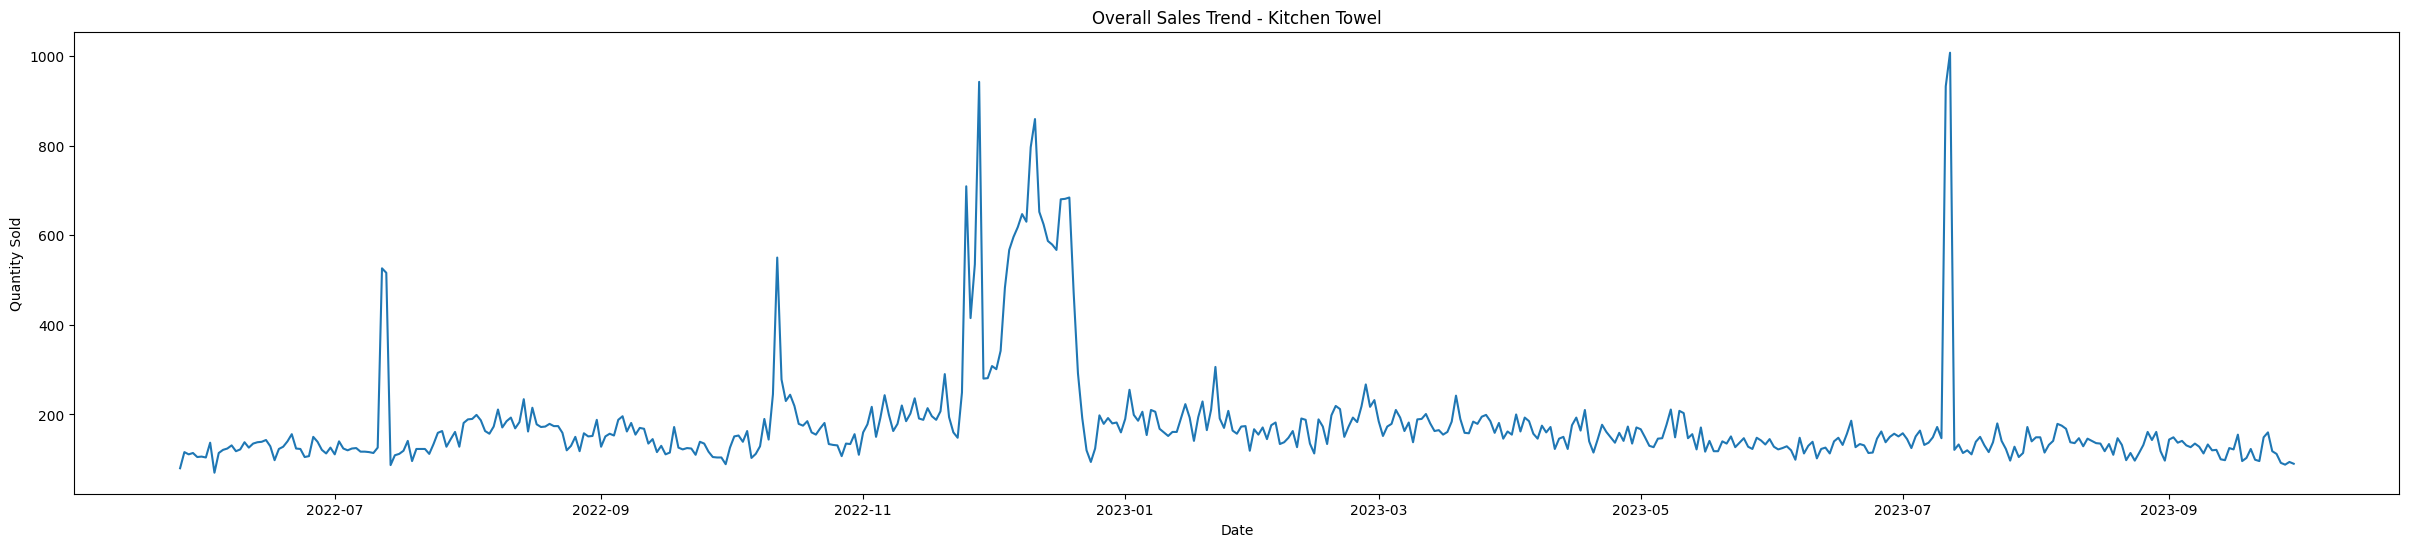

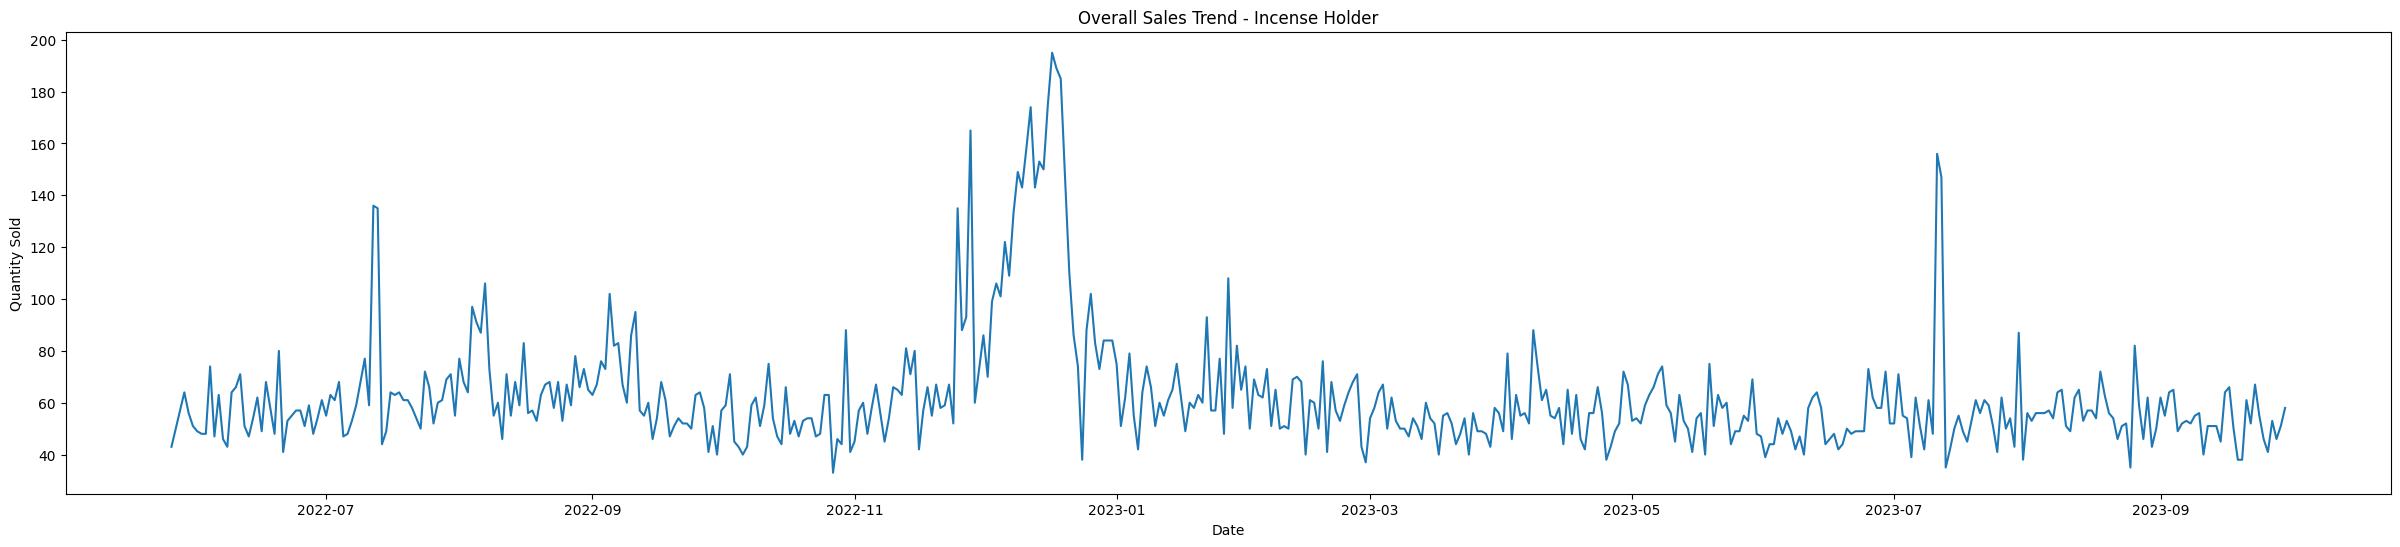

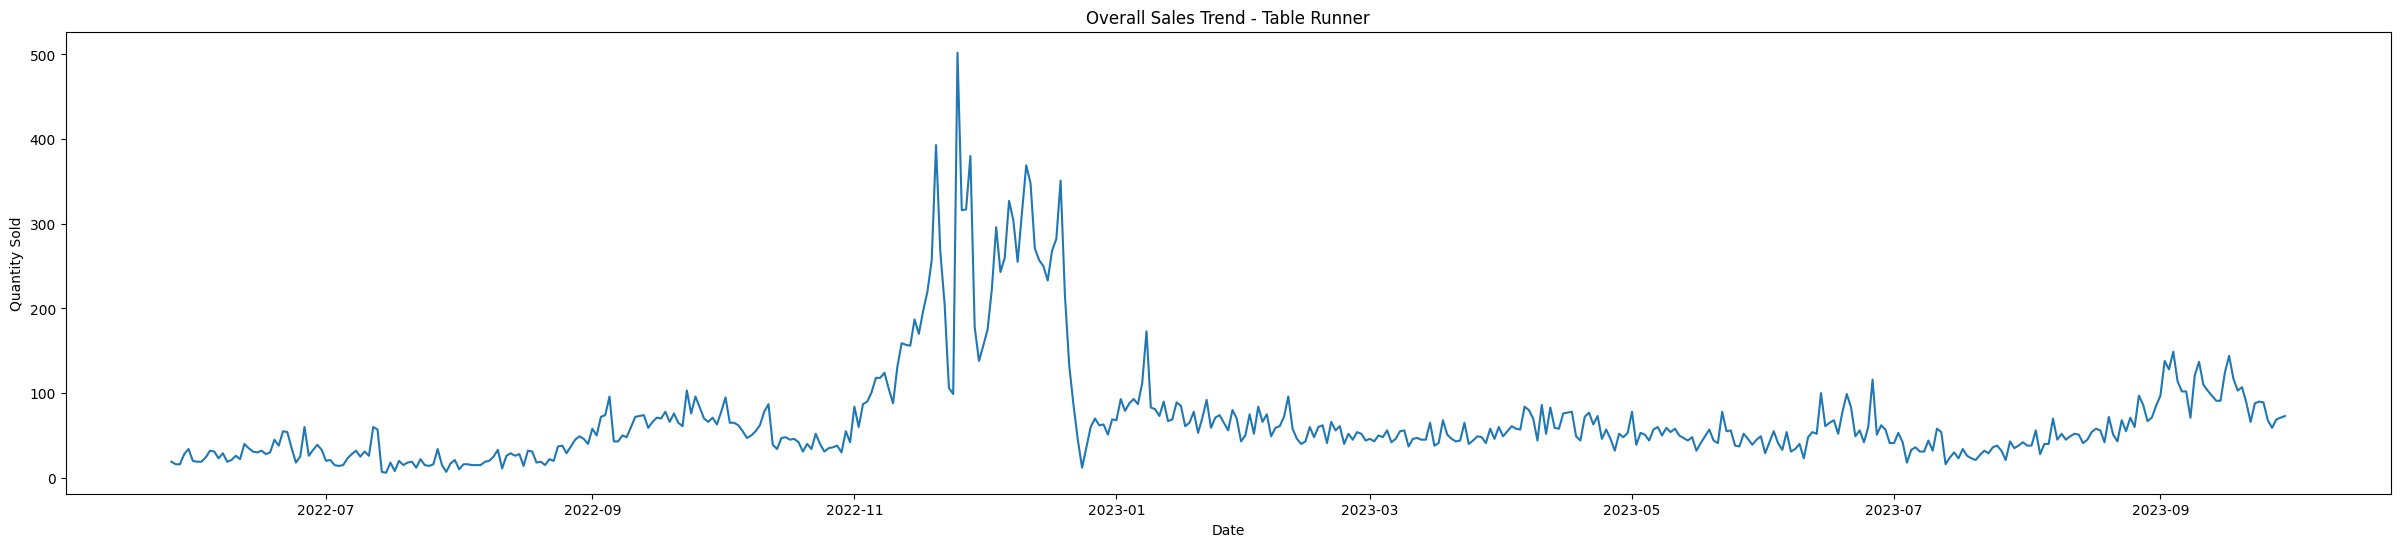

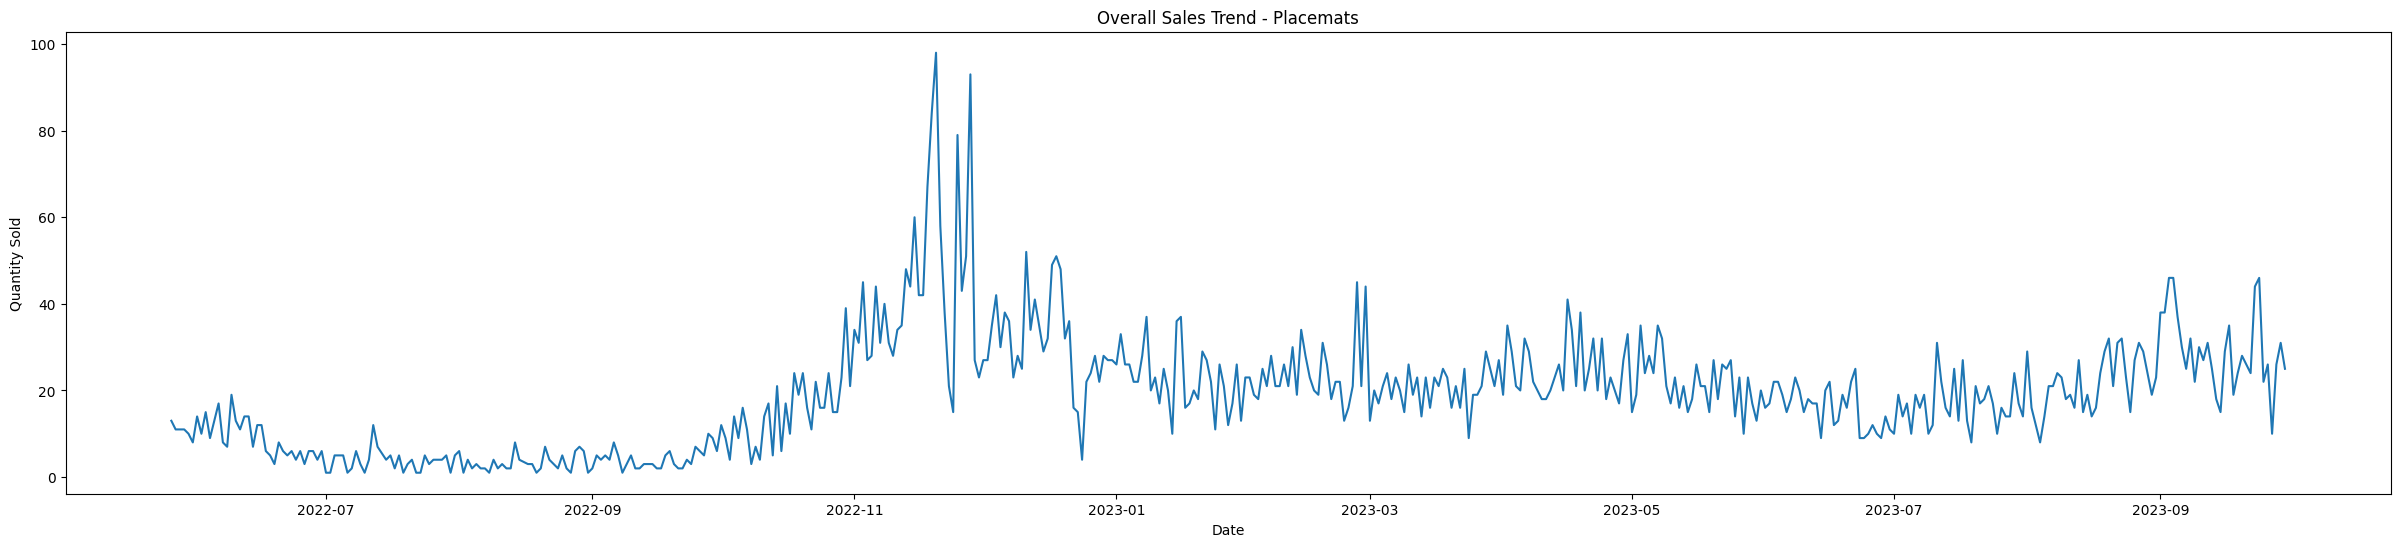

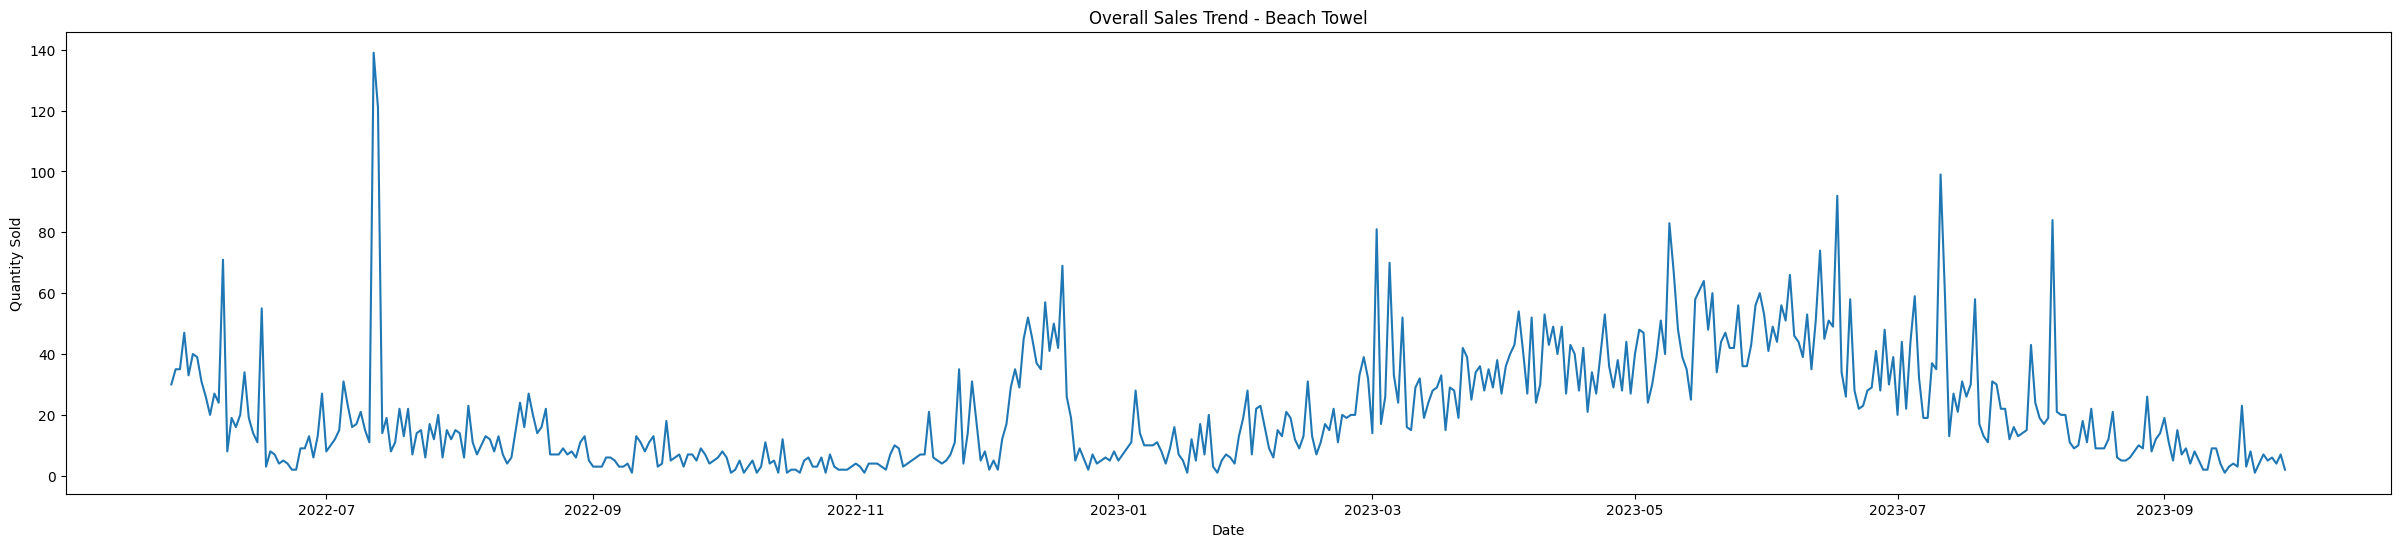

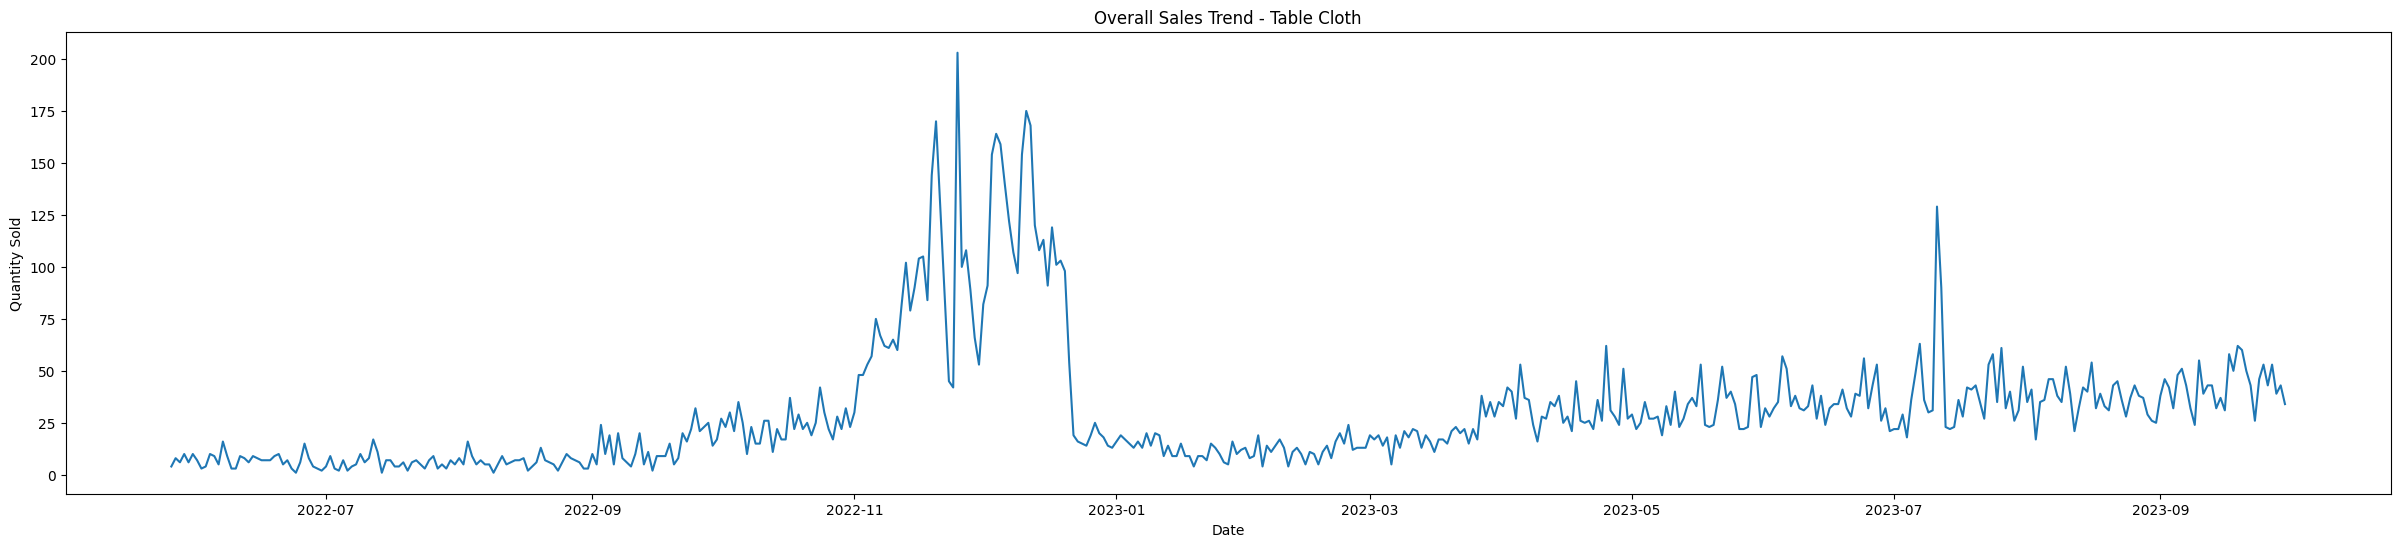

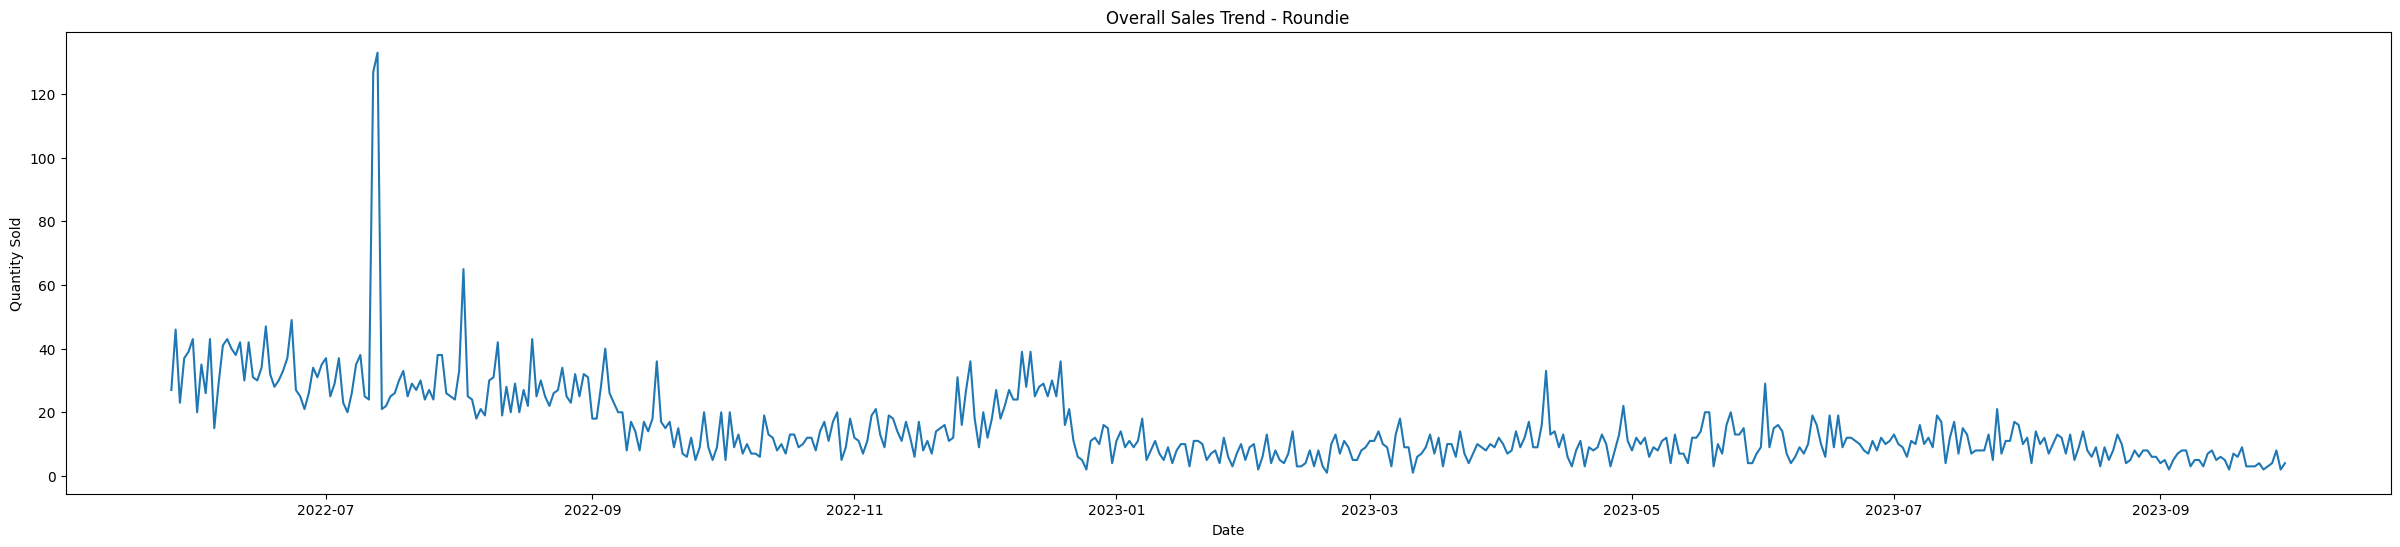

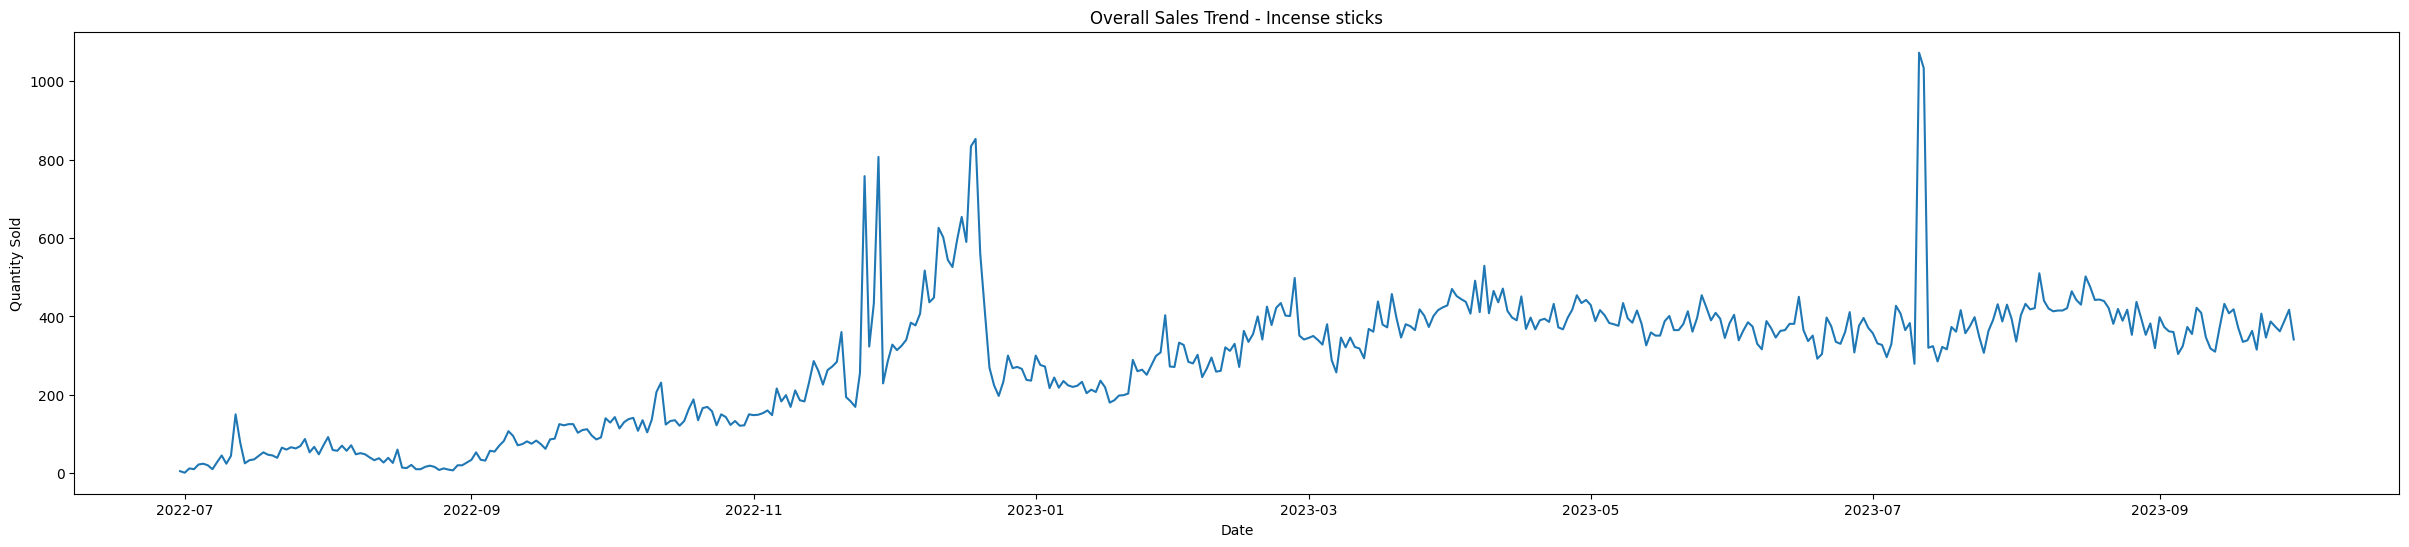

In [ ]:
### Plotting category's sales quantity

c = 0
for i in category_wise_df['product category'].unique().tolist():
    cur_category_wise_df_i = category_wise_df[category_wise_df['product category'] == i]
    # Visualize sales trend for cur specific category_wise
    cur_category_wise_df_i  = pd.DataFrame(cur_category_wise_df_i.groupby(["product category","on_date"])['quantity sold'].sum()).reset_index()
    plt.figure(figsize=(30, 6))
    plt.plot(cur_category_wise_df_i['on_date'], cur_category_wise_df_i['quantity sold'])
    plt.title(f'Overall Sales Trend - {i}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.show()
    c+=1
    if c==10:
        break

#### Analysis for checking trend, seasonality

In [ ]:
seasonal_components = []
trend_components = []
period = 40

In [ ]:
category_wise_df = category_wise_df.sort_values(by = "on_date")

In [ ]:
all_cat_in_cat_df = category_wise_df['product category'].unique().tolist()

In [ ]:
for i in all_cat_in_cat_df:
    cur_cat_val = category_wise_df[category_wise_df['product category'] == i].groupby("on_date")['quantity sold'].sum().tolist()
    stl = seasonal_decompose(cur_cat_val,period = period)
    result = stl
    seasonal_components.append([result.seasonal])
    trend_components.append([result.trend])

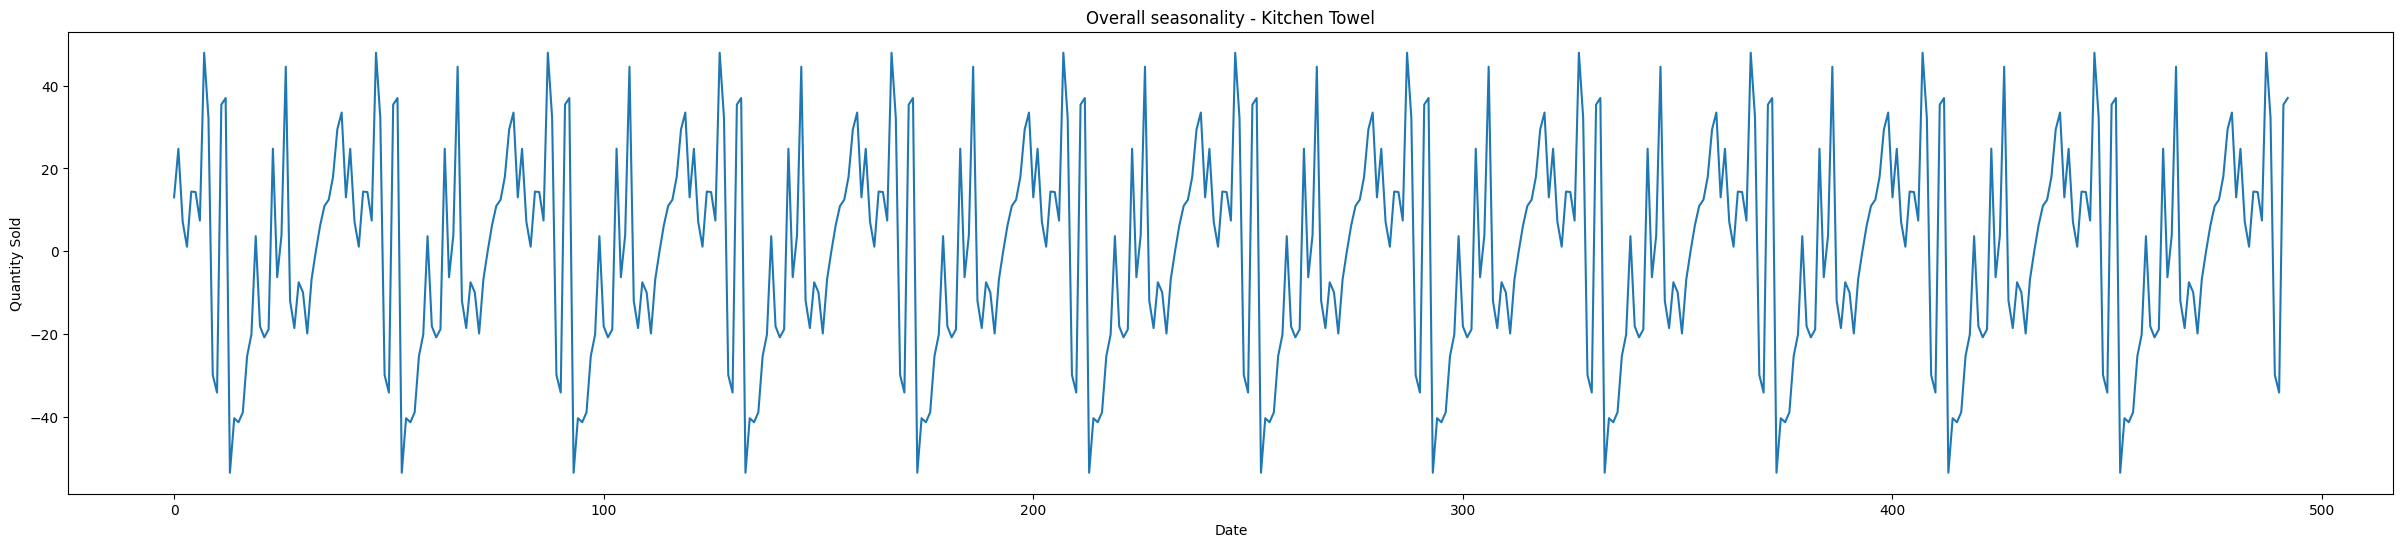

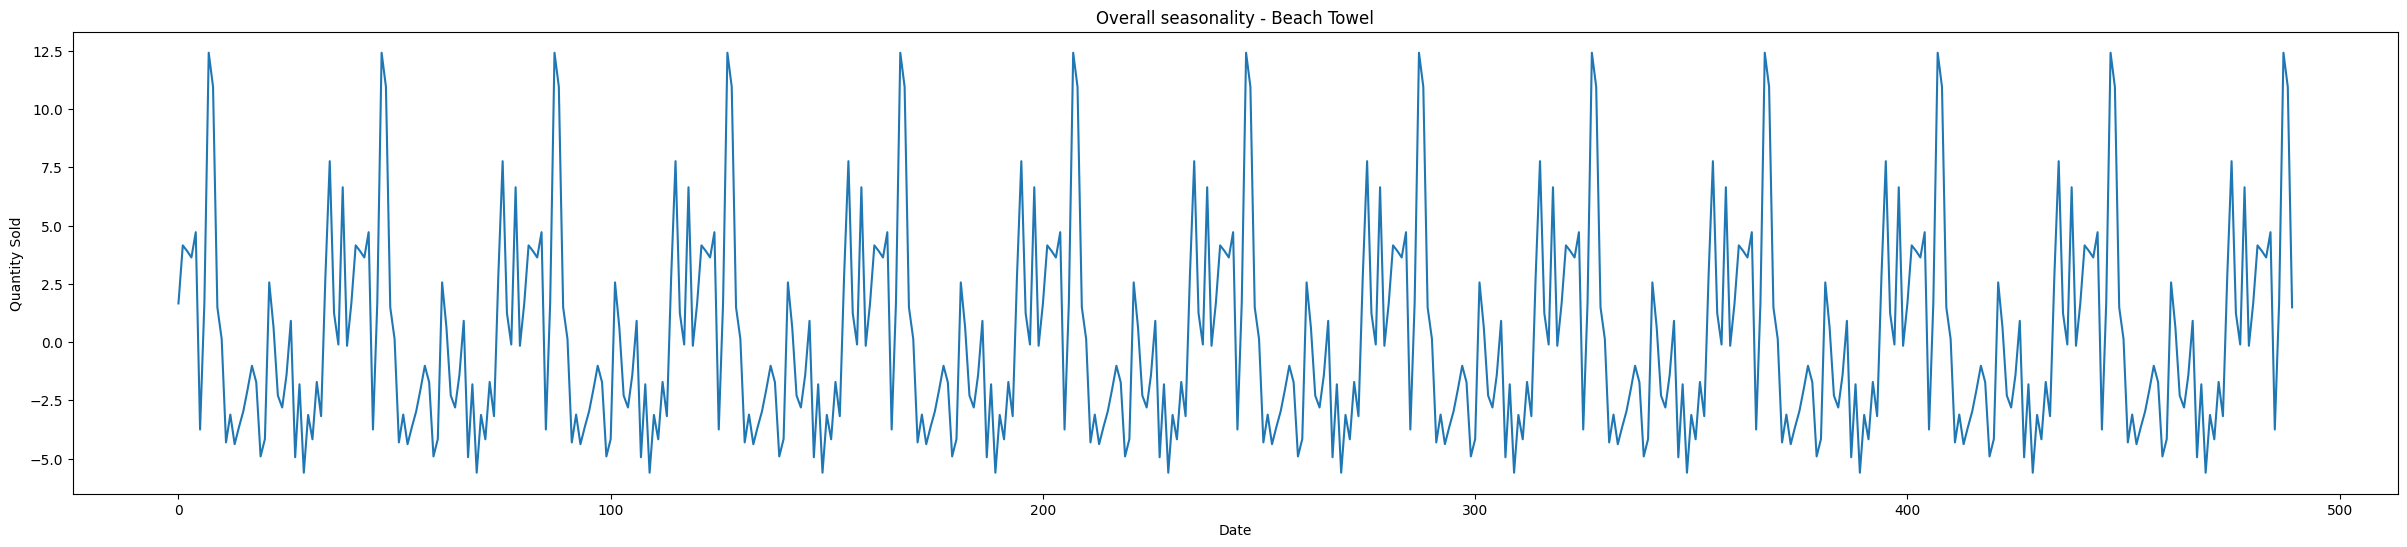

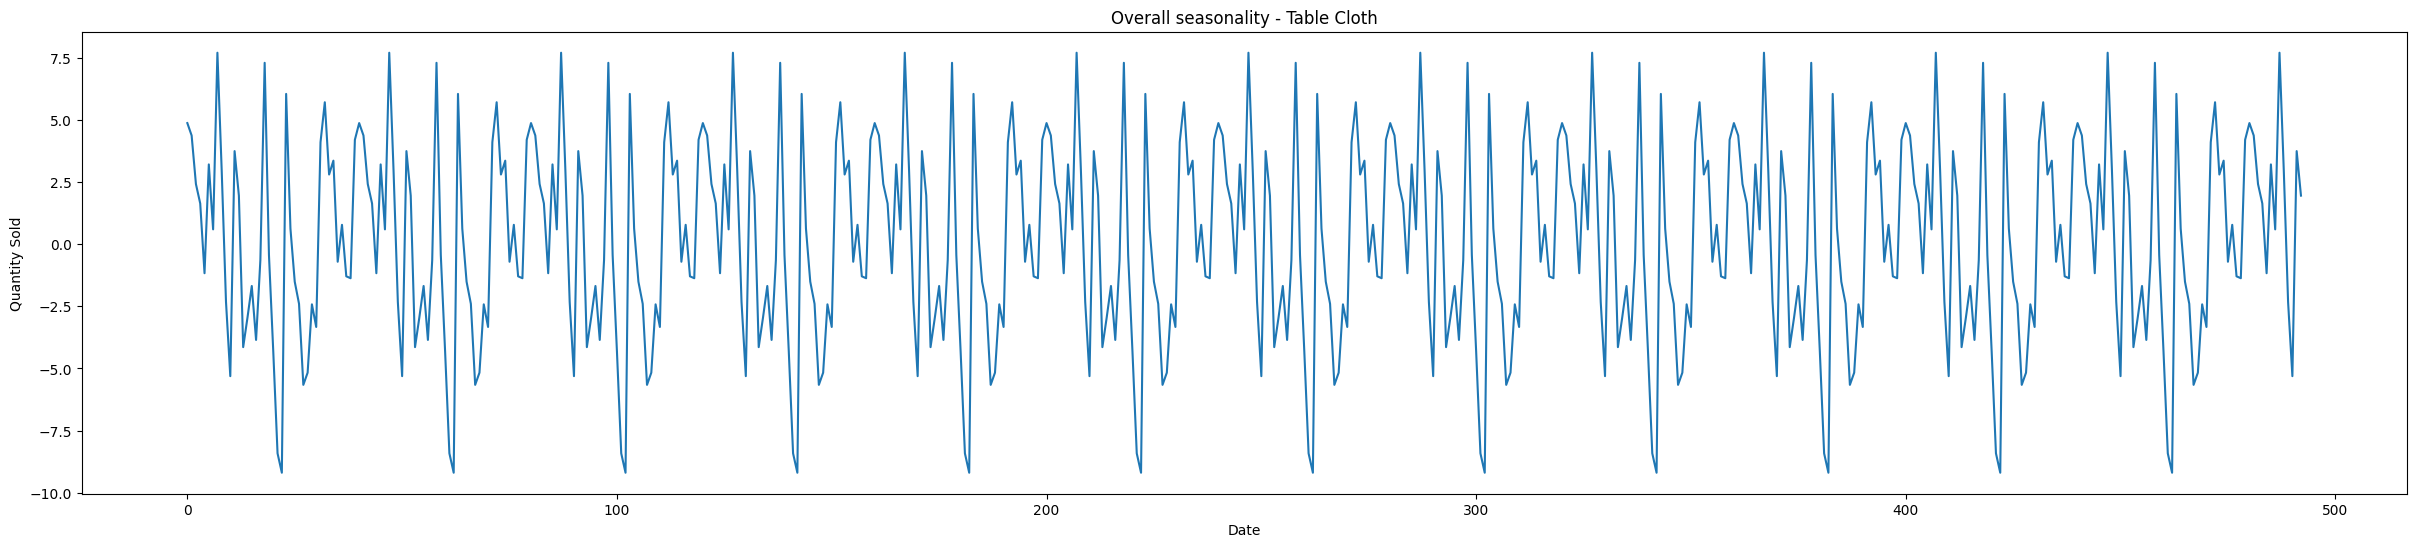

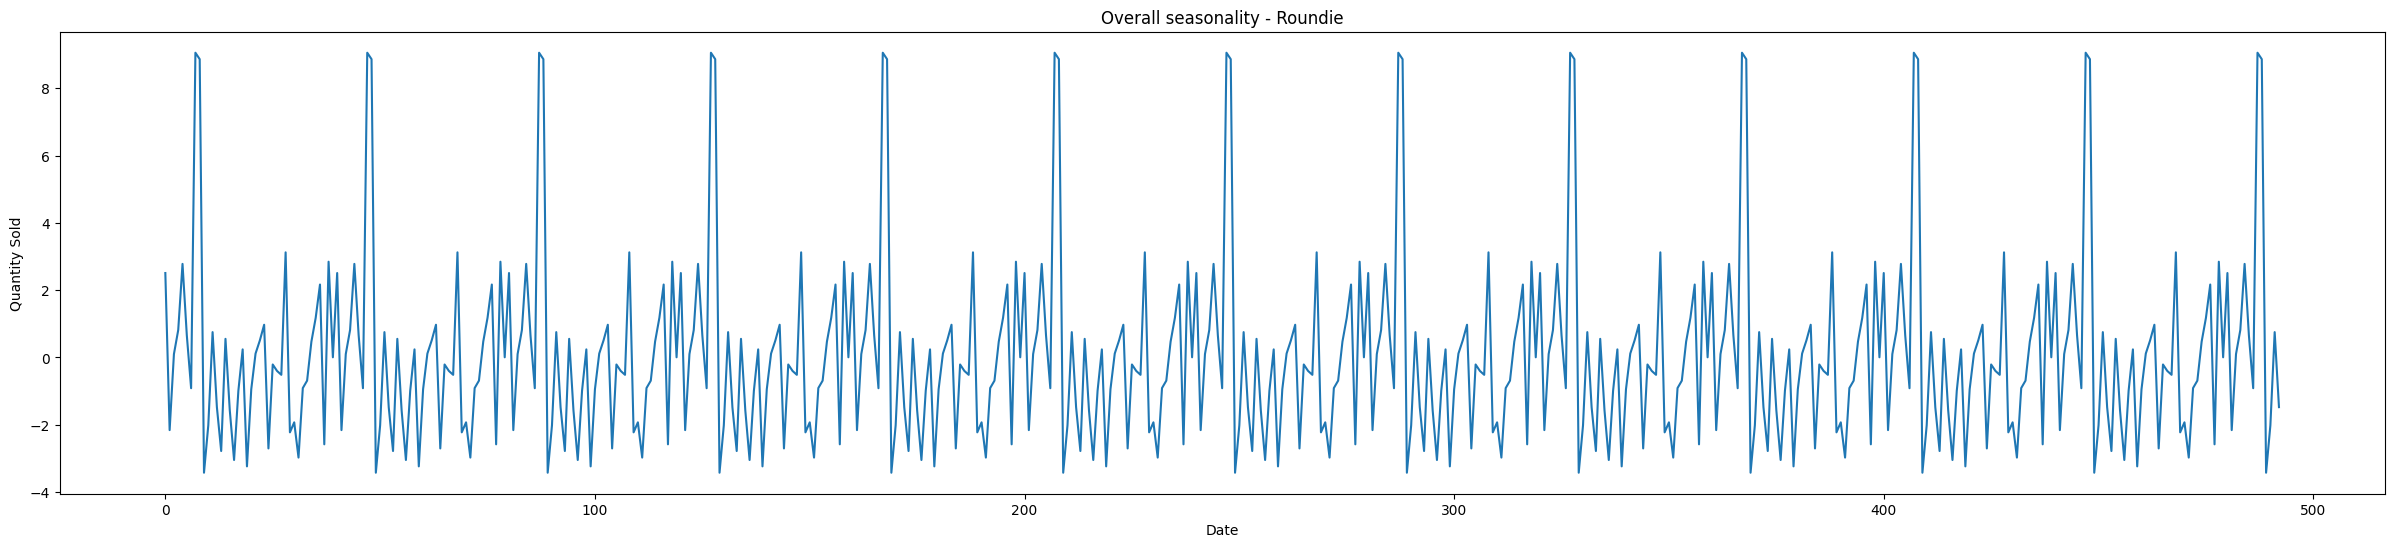

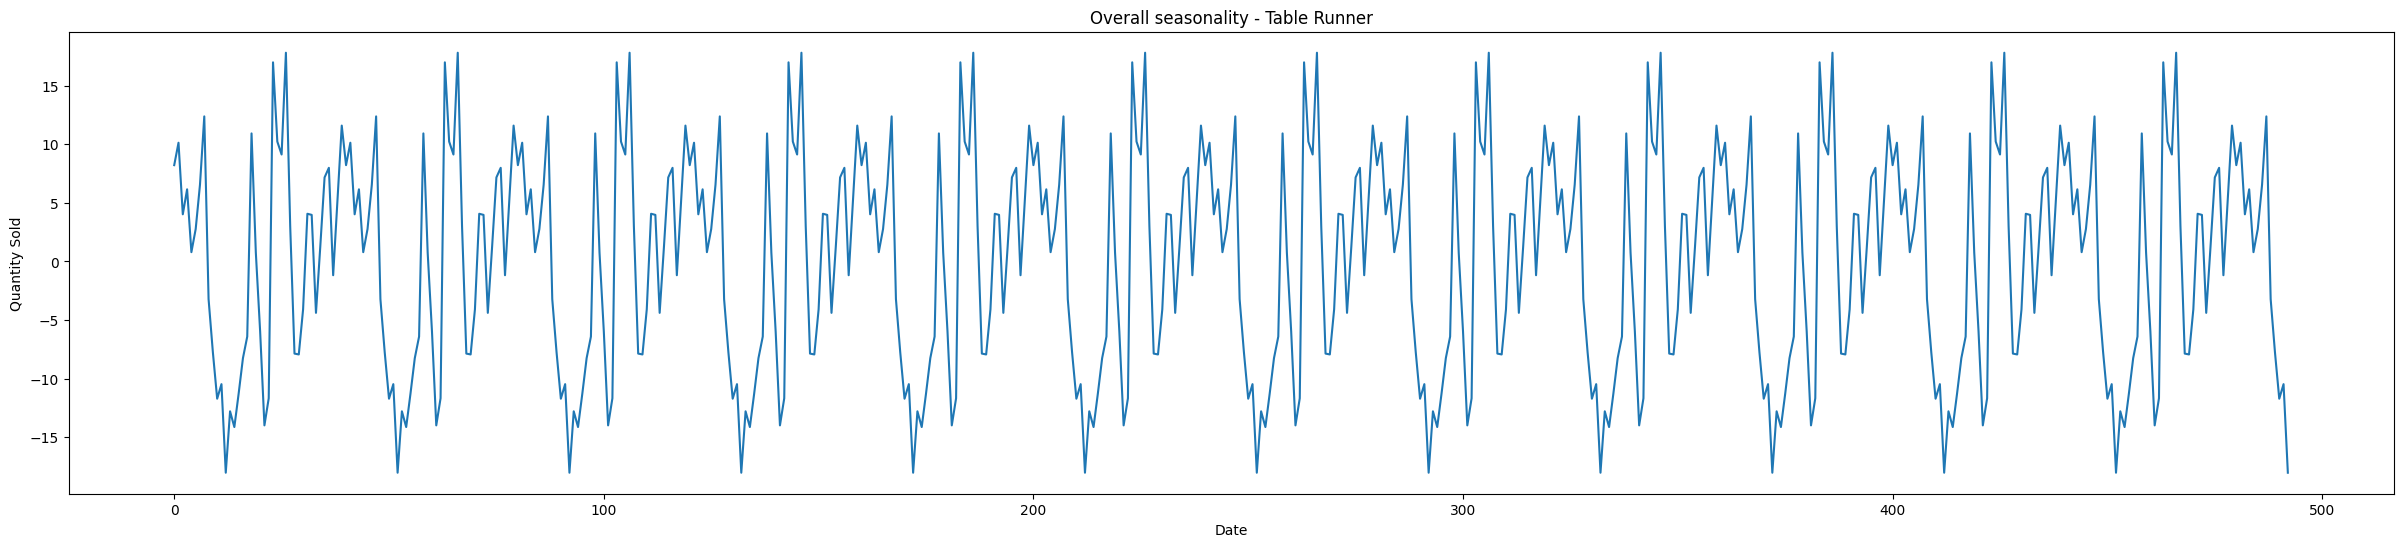

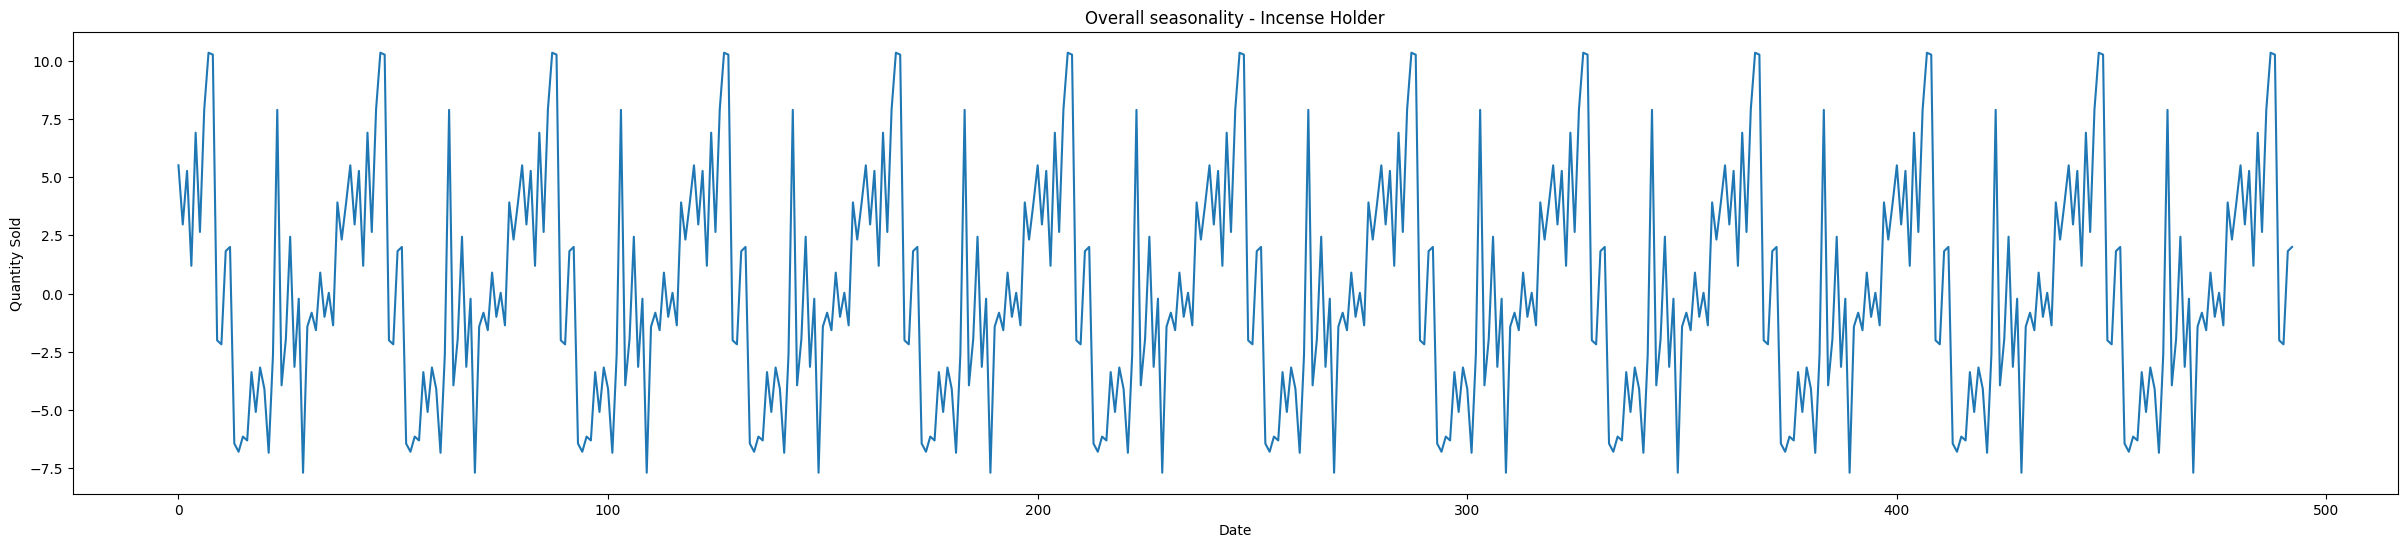

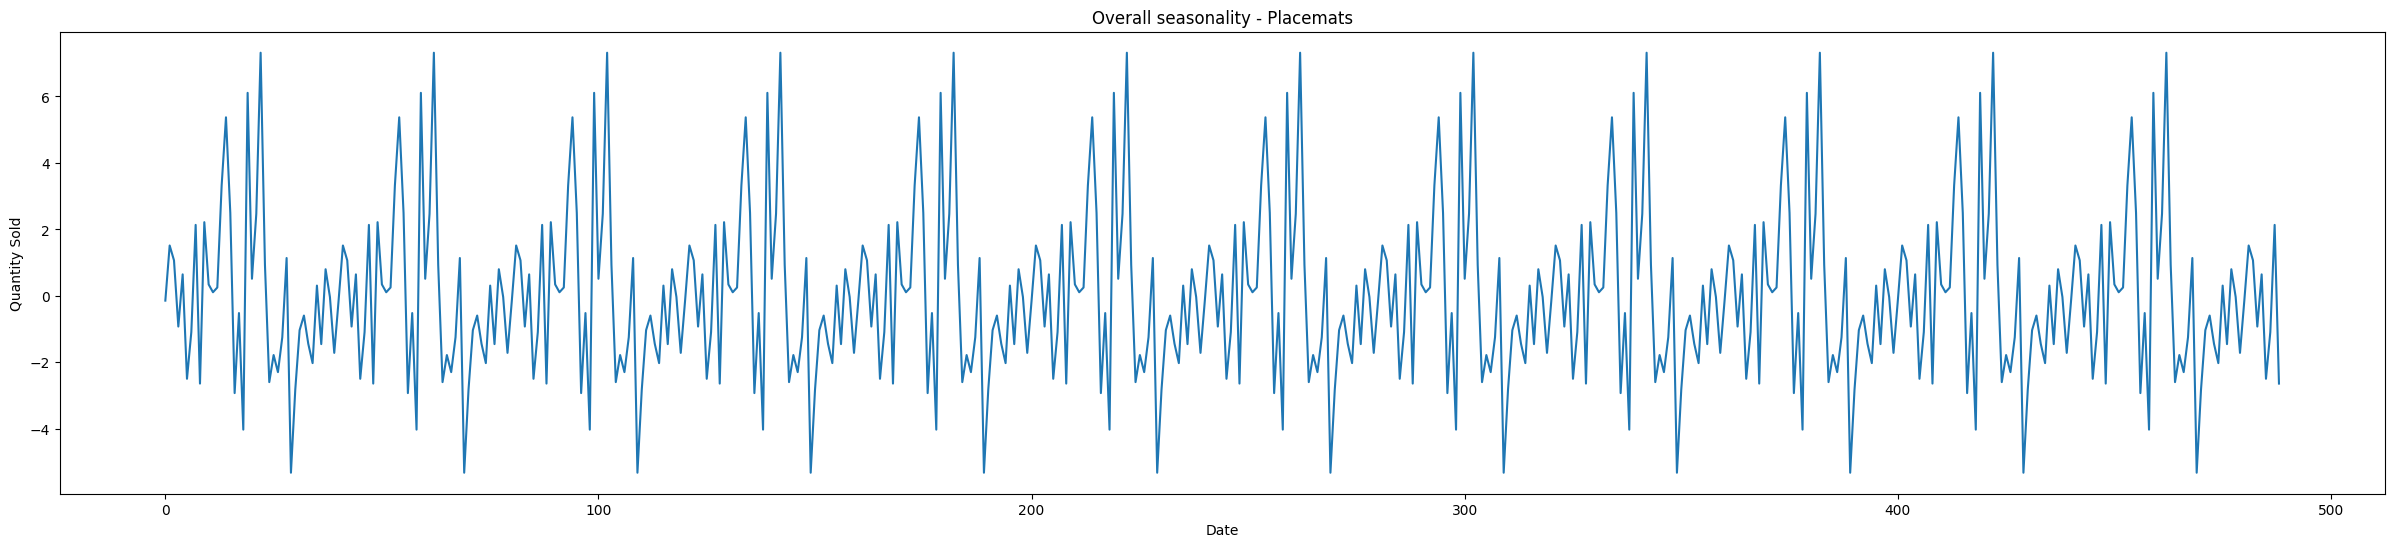

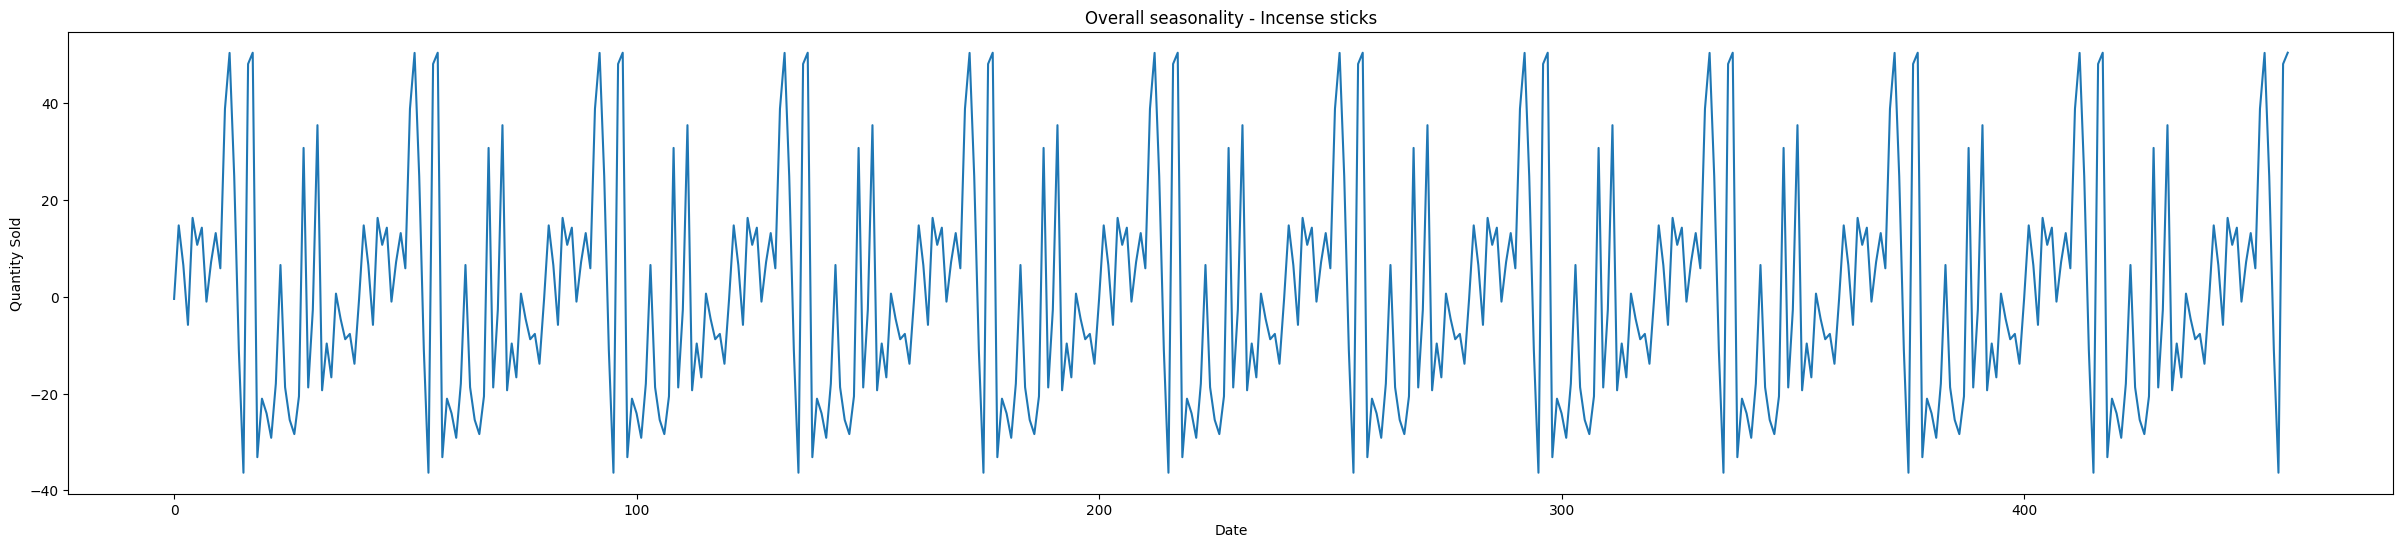

In [ ]:
c = 0
for i in all_cat_in_cat_df:
    plt.figure(figsize=(30, 6))
    plt.plot(range(len(seasonal_components[c][0])),seasonal_components[c][0])
    plt.title(f'Overall seasonality - {i}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.show()
    c+=1

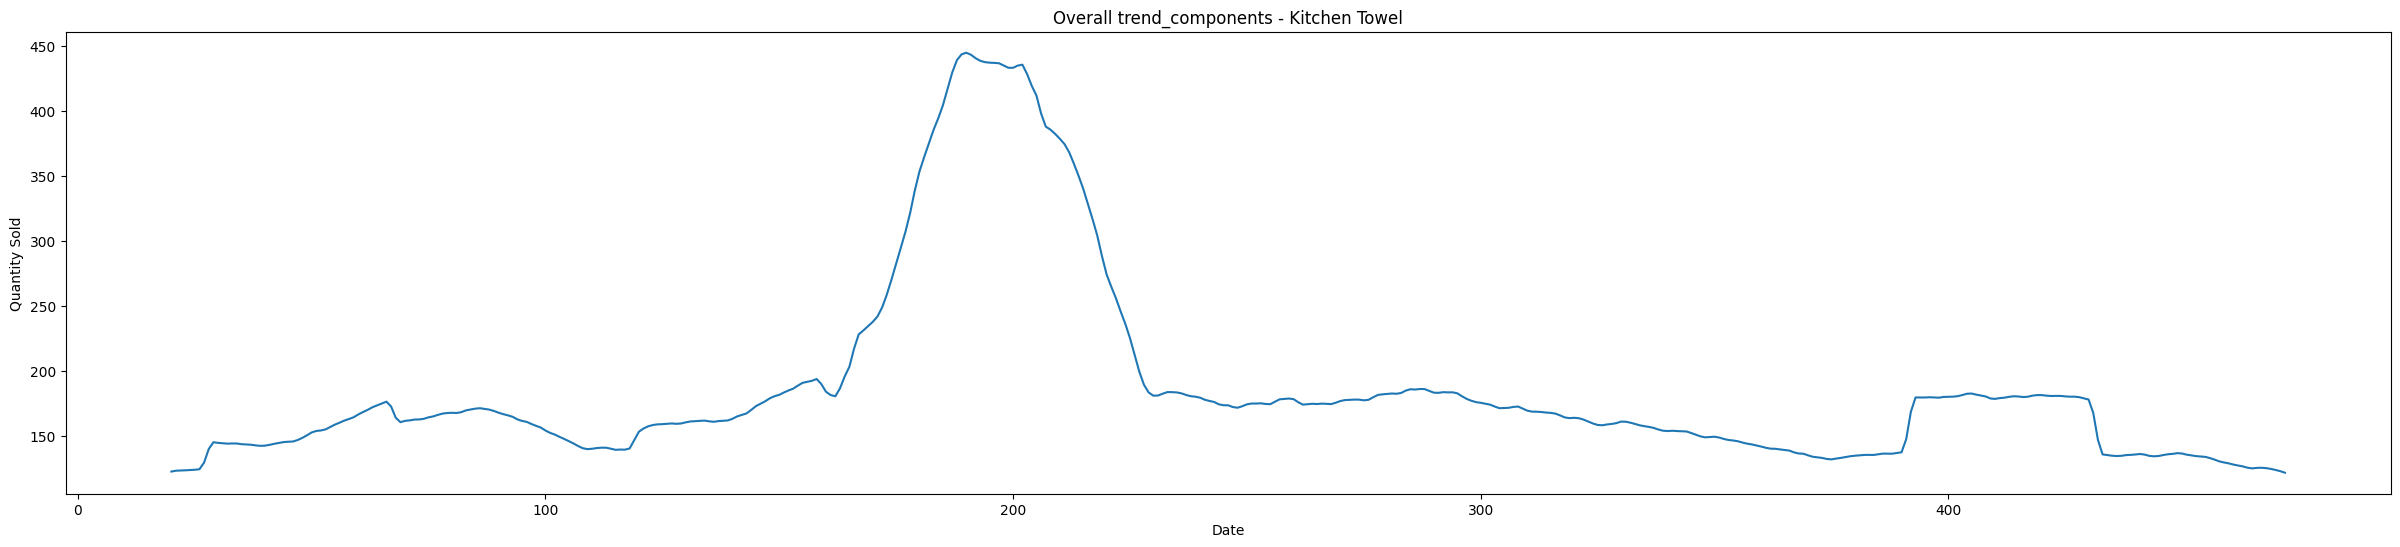

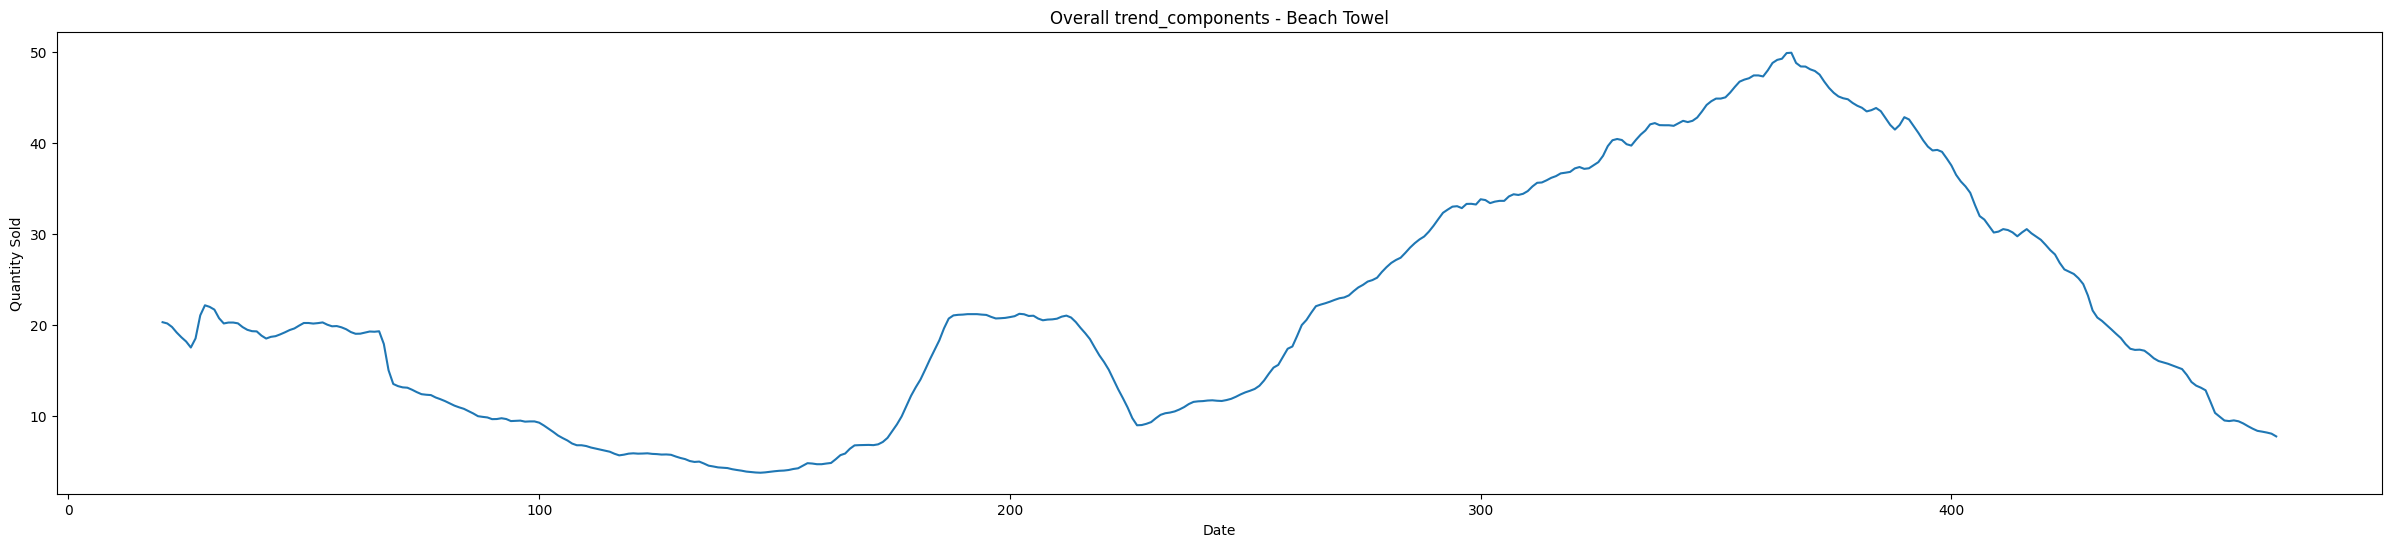

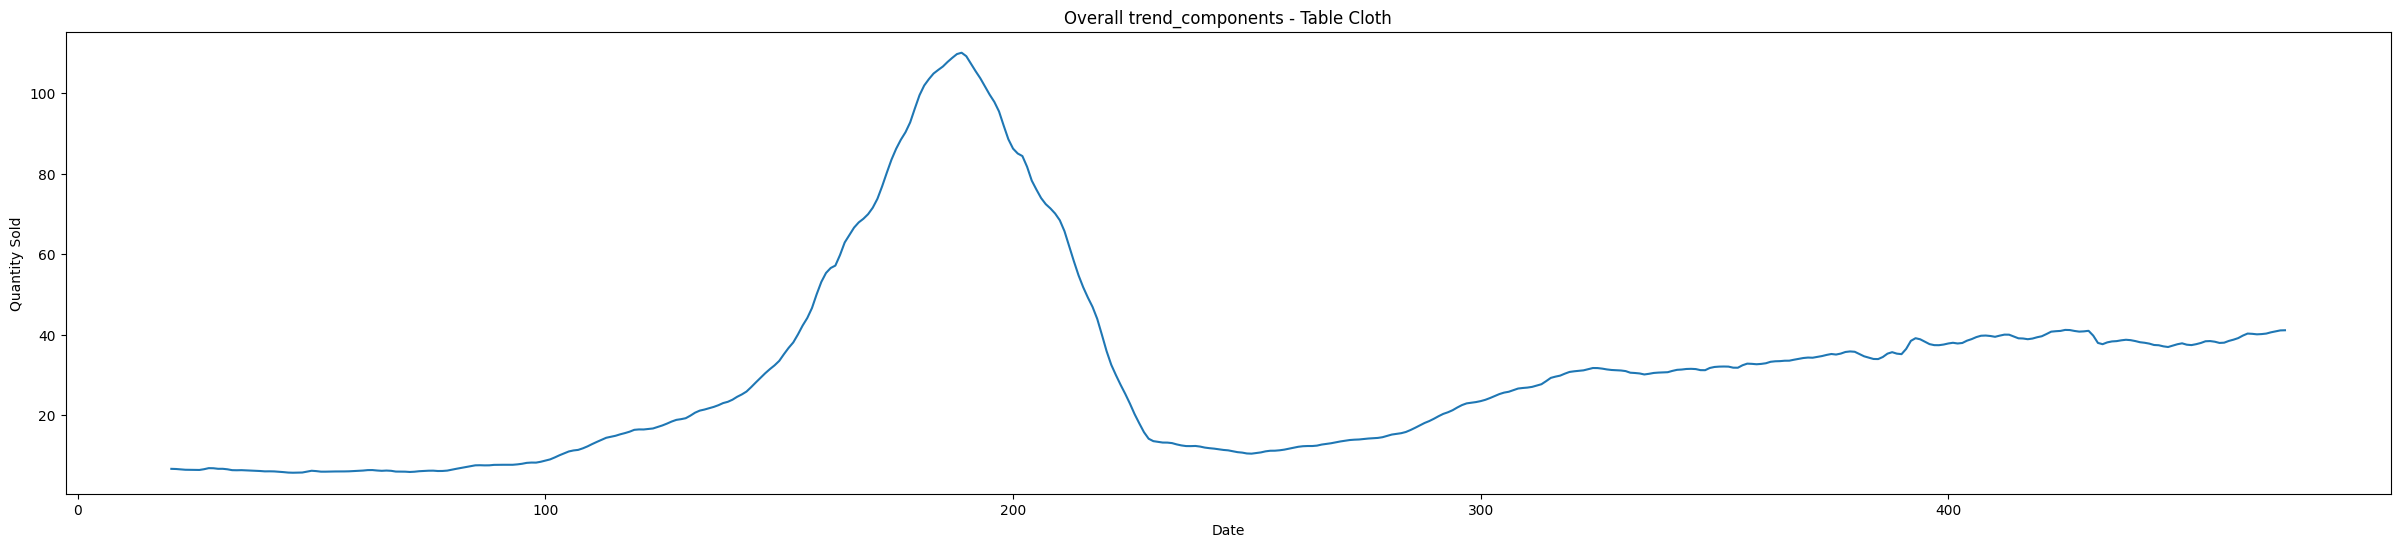

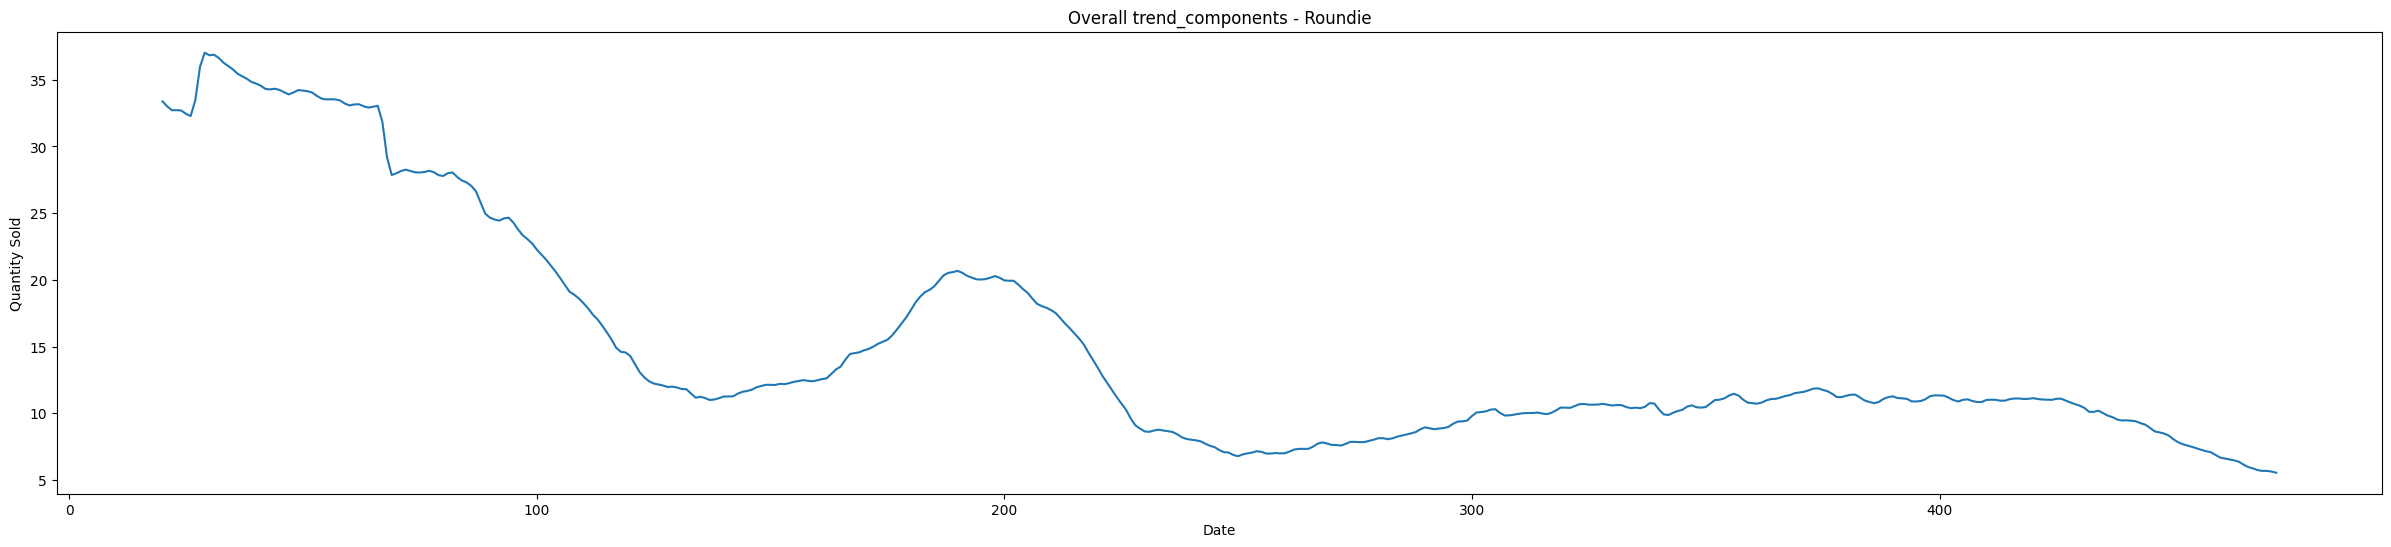

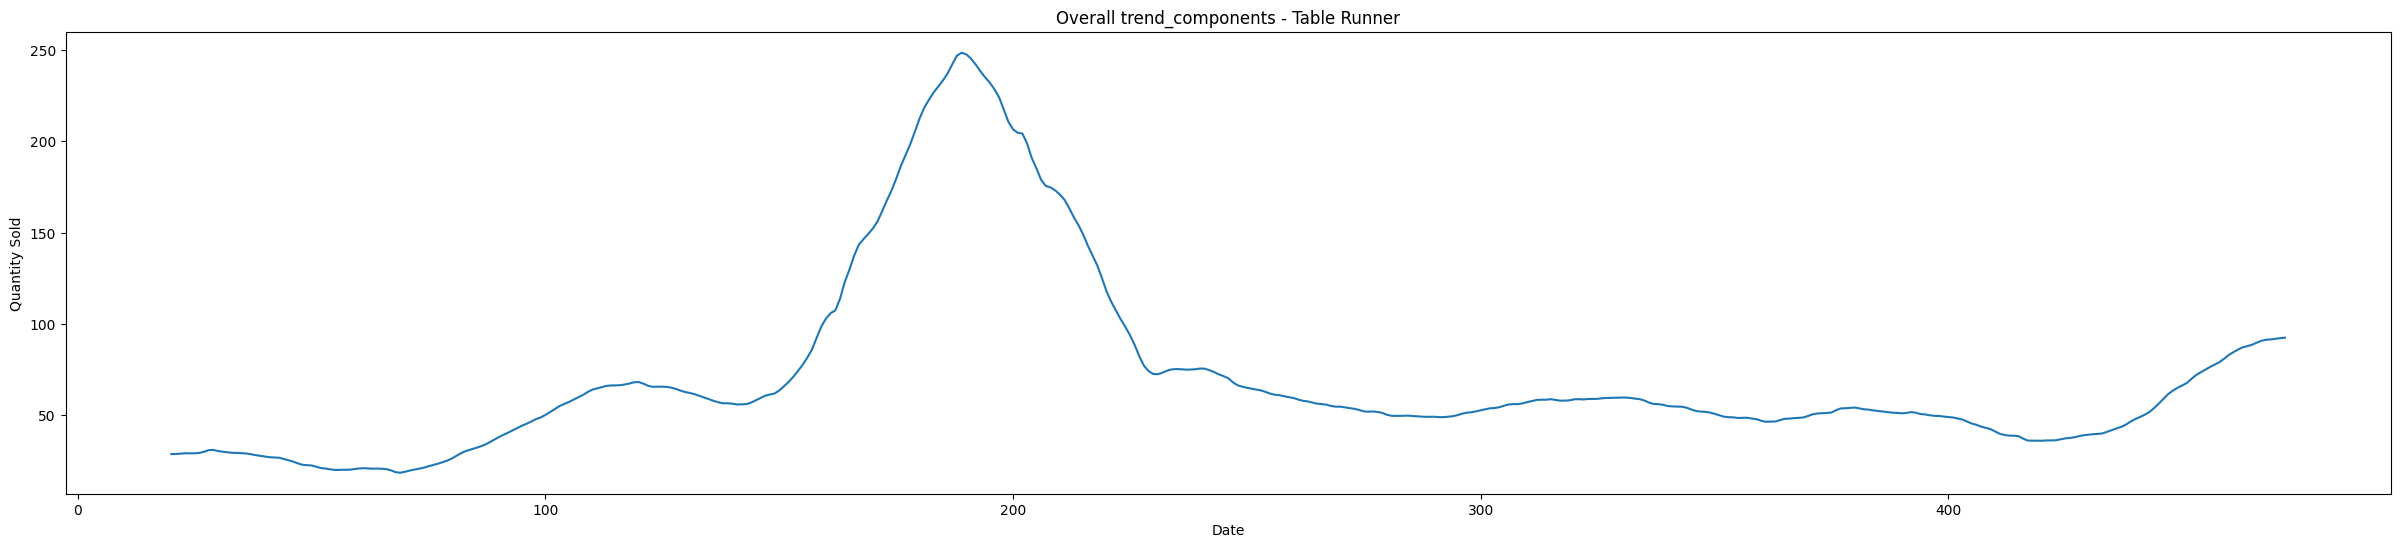

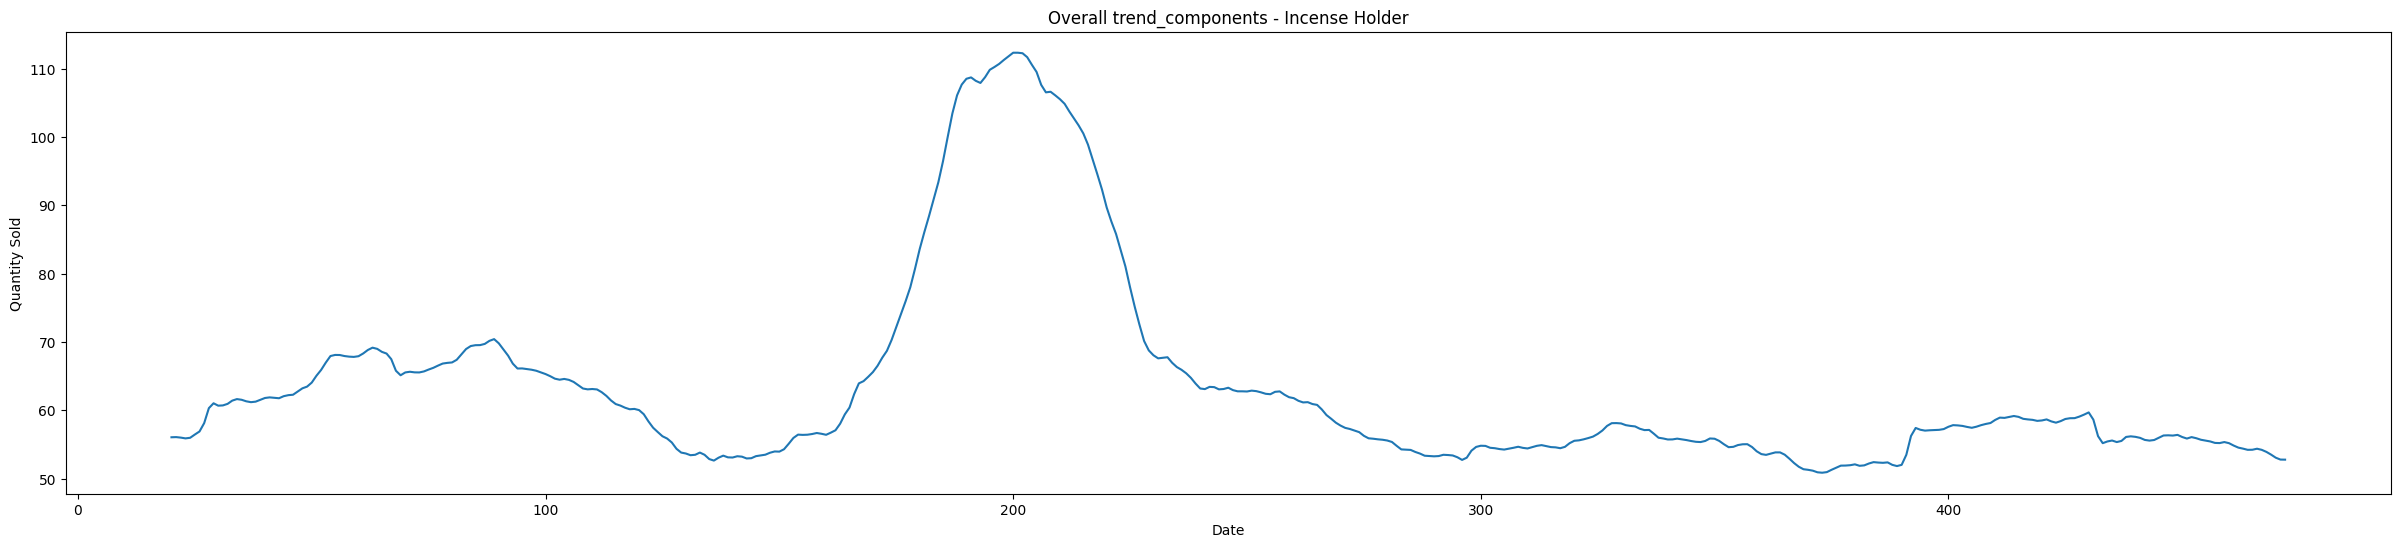

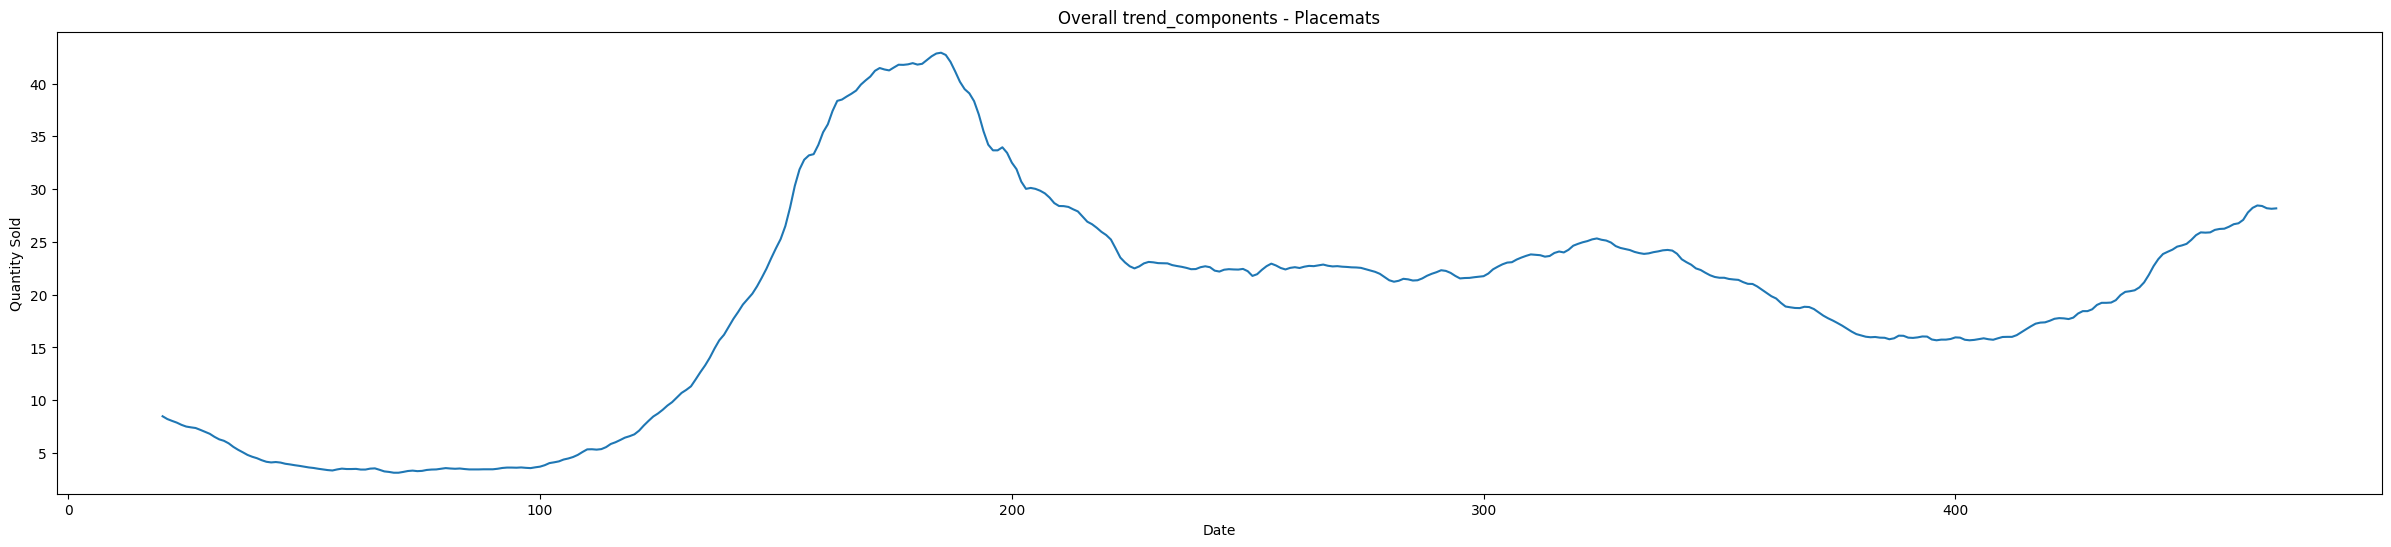

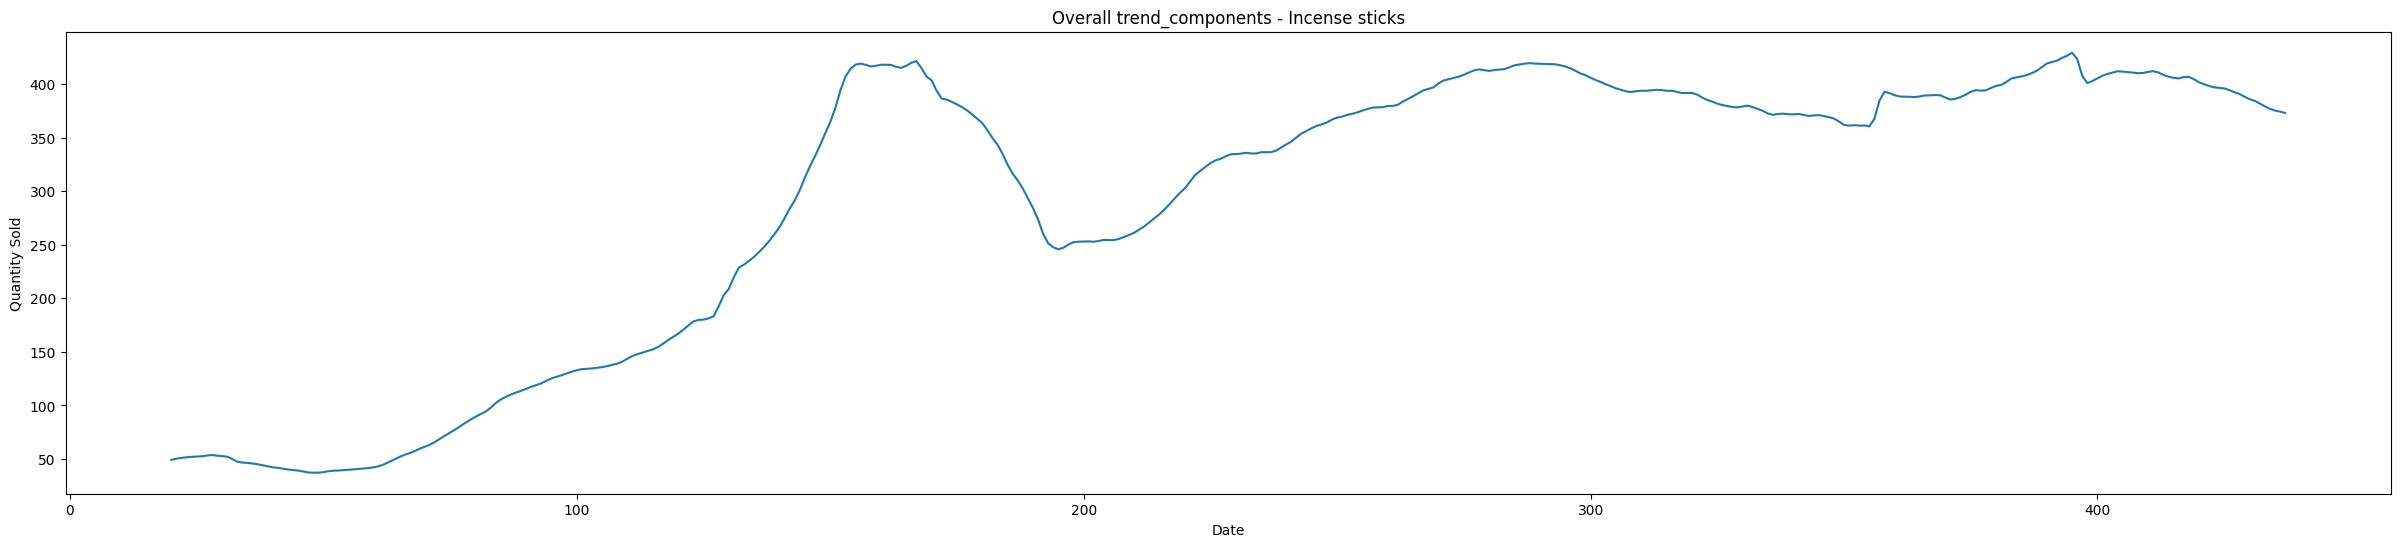

In [ ]:
c = 0
for i in all_cat_in_cat_df:
    plt.figure(figsize=(30, 6))
    plt.plot(range(len(trend_components[c][0])),trend_components[c][0])
    plt.title(f'Overall trend_components - {i}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.show()
    c+=1

## Forecasting

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN

In [ ]:
category_wise_df_new = category_wise_df[["product category","on_date","quantity sold"]]

In [ ]:
category_wise_df_new.head(1)

product category    on_date  quantity sold
0    Kitchen Towel 2022-05-26              2

In [ ]:
category_wise_df_new.rename(columns = {"product category":"unique_id","on_date":"ds","quantity sold":"y"},inplace = True)

In [ ]:
category_wise_df_new.head(1)

unique_id         ds  y
0  Kitchen Towel 2022-05-26  2

In [ ]:
category_wise_df_new['ds'] = pd.to_datetime(category_wise_df_new['ds'])
category_wise_df_new['y'] = category_wise_df_new['y'].astype(int)

In [ ]:
all_new_cat = category_wise_df_new['unique_id'].unique().tolist()
all_new_cat

['Kitchen Towel',
 'Beach Towel',
 'Table Cloth',
 'Roundie',
 'Table Runner',
 'Incense Holder',
 'Placemats',
 'Incense sticks']

In [ ]:
category_wise_df_new['month'] = category_wise_df_new['ds'].dt.month
category_wise_df_new['week'] = category_wise_df_new['ds'].dt.week
category_wise_df_new['year_week'] = category_wise_df_new['ds'].dt.strftime('%Y-%U')

In [ ]:
category_wise_df_new = category_wise_df_new.reset_index(drop = True)

In [ ]:
category_wise_df_new.shape

(75380, 6)

In [ ]:
all_df = []
for i in category_wise_df_new['unique_id'].unique().tolist():
    cur_stat_df = {
        "unique_id_x":[],
        "ds":[],
        "year_week":[],
        "y_y":[]

    }
    #cur_cat_df = category_wise_df_new[category_wise_df_new['unique_id'] == i].reset_index(drop = True)
    xyz = pd.DataFrame(category_wise_df_new[category_wise_df_new['unique_id'] == i].reset_index(drop = True).groupby(["year_week","unique_id"])['y'].sum()).reset_index()
    abc = category_wise_df_new[category_wise_df_new['unique_id'] == i]
    abc_xyz = pd.merge(abc,xyz,on = "year_week",how = "left")
    unique_year_week = abc_xyz['year_week'].unique().tolist()
    for j in unique_year_week:
        cur_abc_xyz = abc_xyz[abc_xyz['year_week'] == j].iloc[0]
        #cur_stat_df.append(cur_abc_xyz)
        cur_stat_df['unique_id_x'].append(cur_abc_xyz.unique_id_x)
        cur_stat_df['ds'].append(cur_abc_xyz.ds)
        cur_stat_df['year_week'].append(cur_abc_xyz.year_week)
        cur_stat_df['y_y'].append(cur_abc_xyz.y_y)

    all_df.append(pd.DataFrame(cur_stat_df))

In [ ]:
category_wise_df_new = pd.concat(all_df)

In [ ]:
category_wise_df_new.rename(columns = {"unique_id_x":"unique_id","y_y":"y"},inplace = True)

In [ ]:
category_wise_df_new = category_wise_df_new[['unique_id','ds','y']]

In [ ]:
all_new_cat = category_wise_df_new['unique_id'].unique().tolist()

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

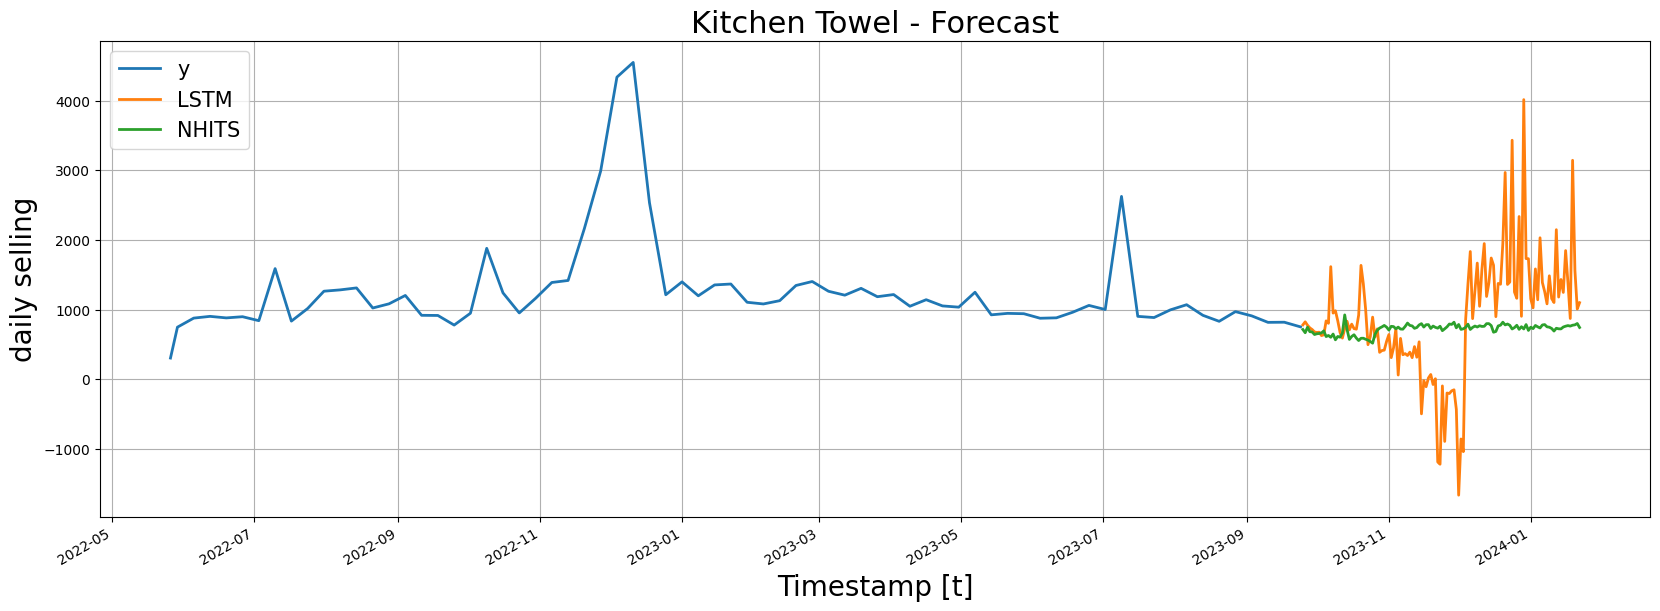

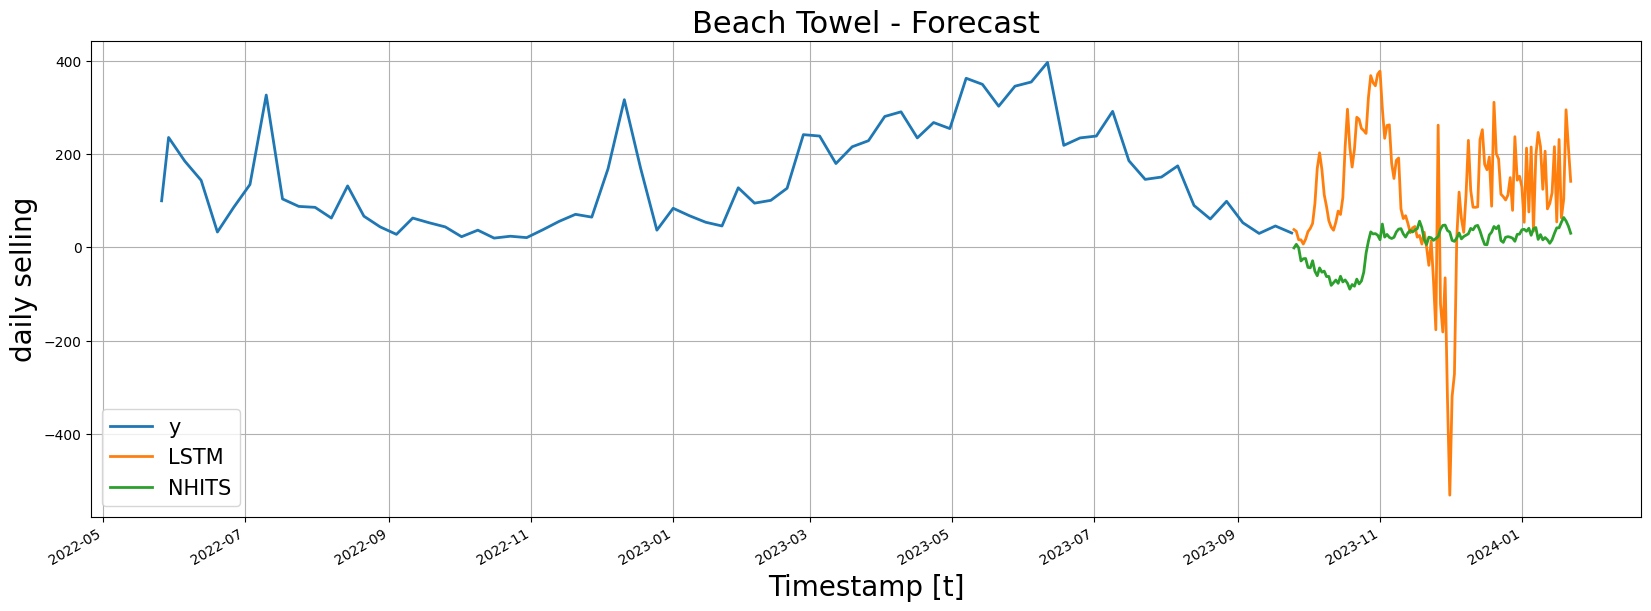

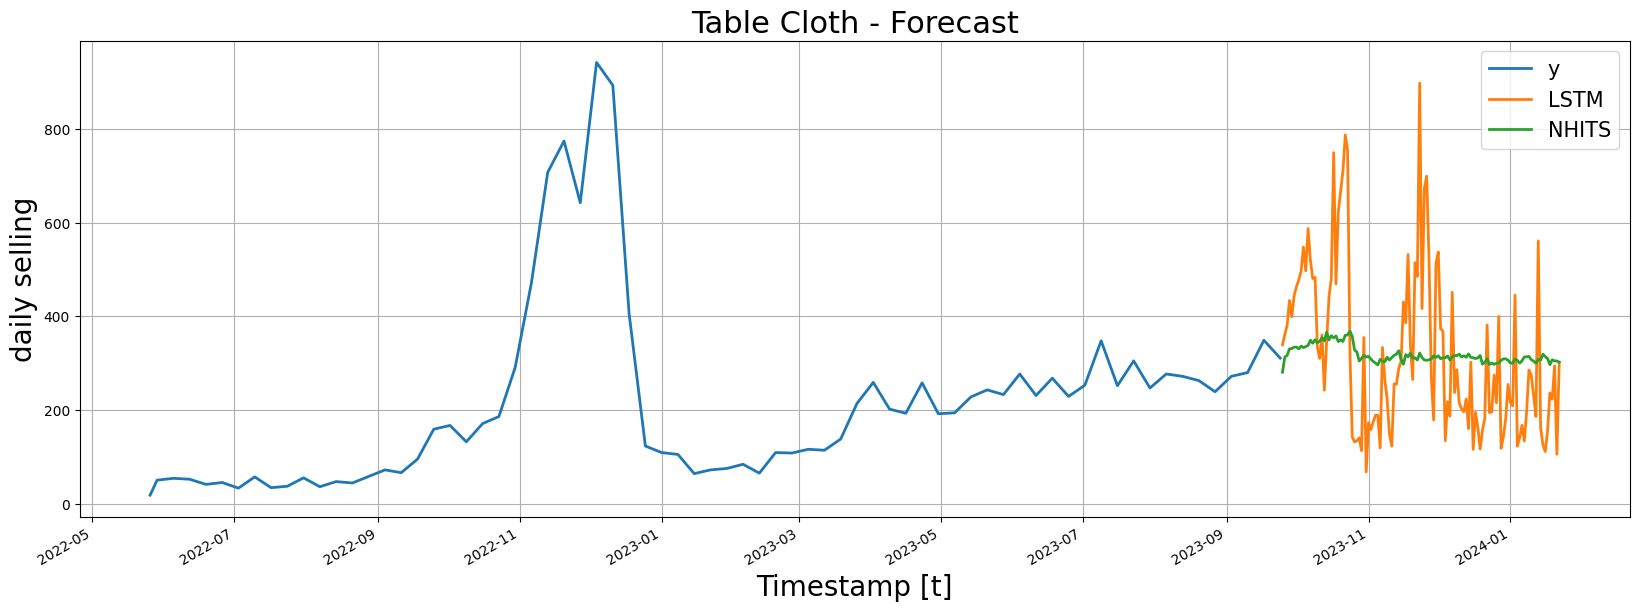

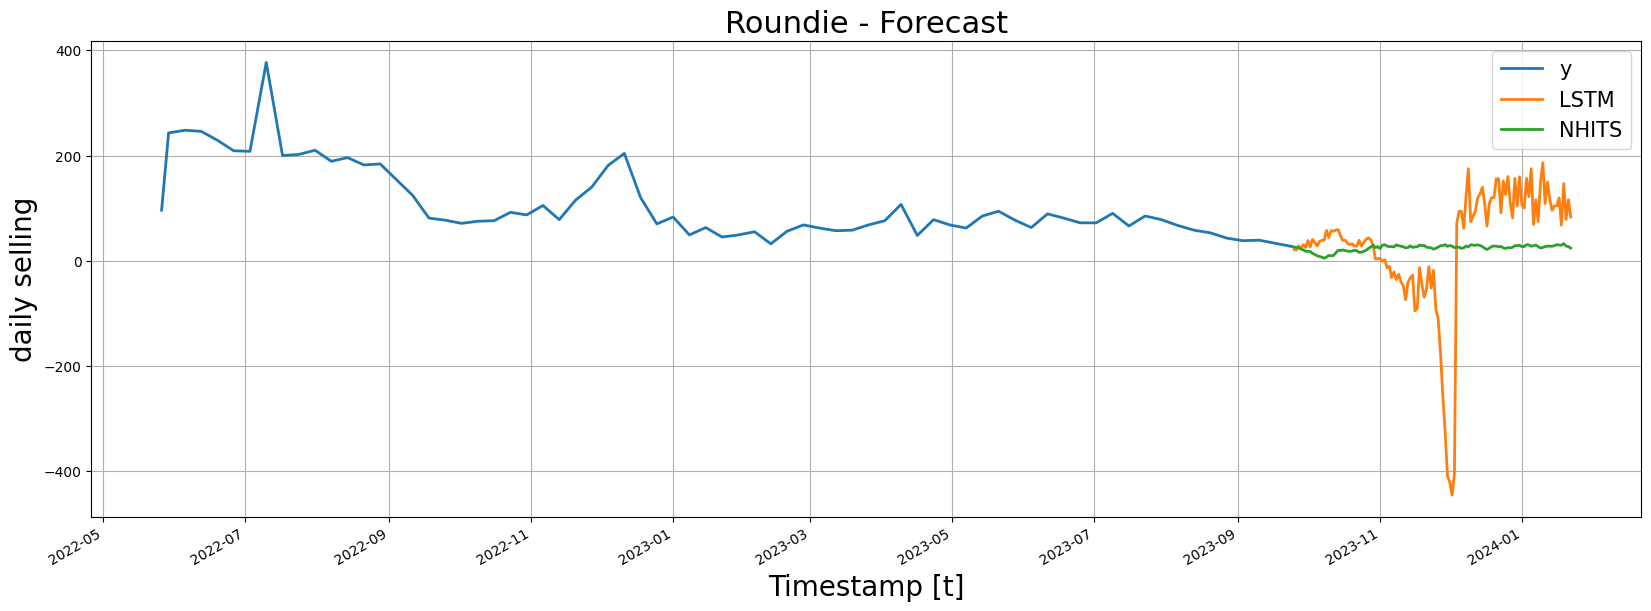

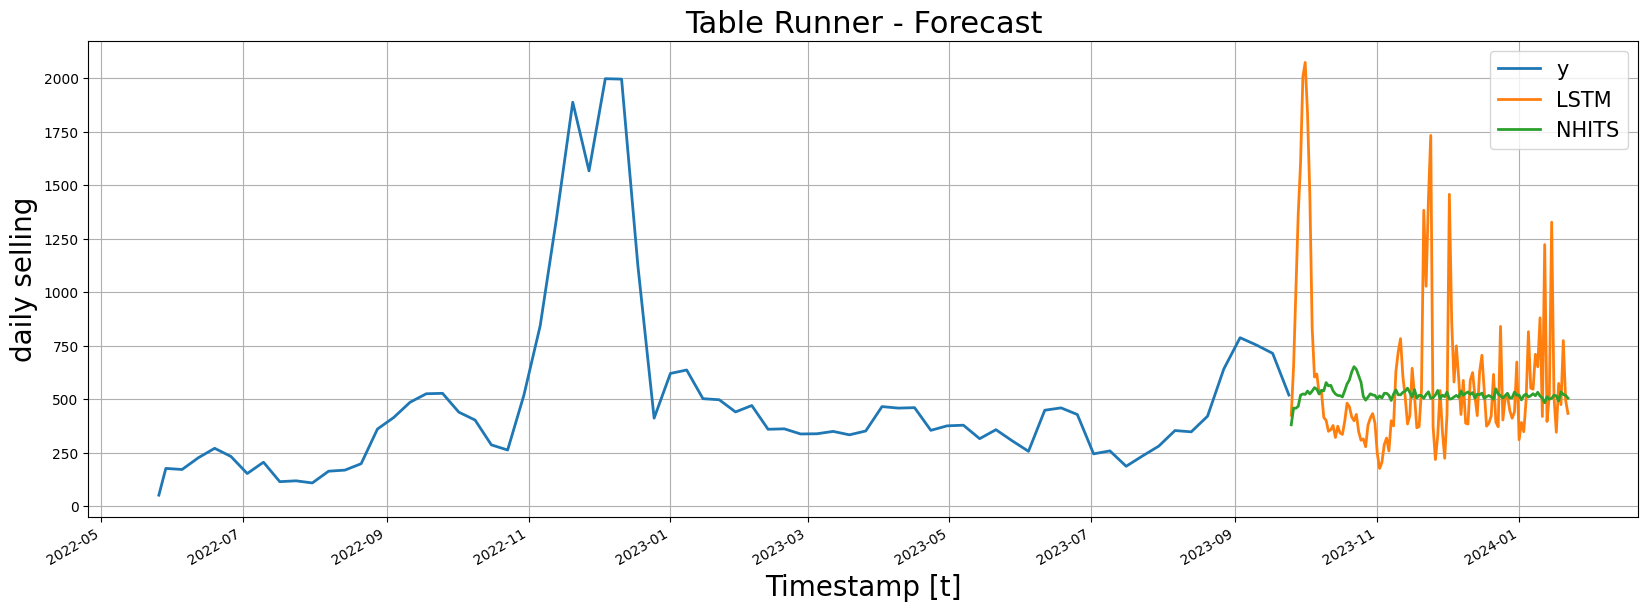

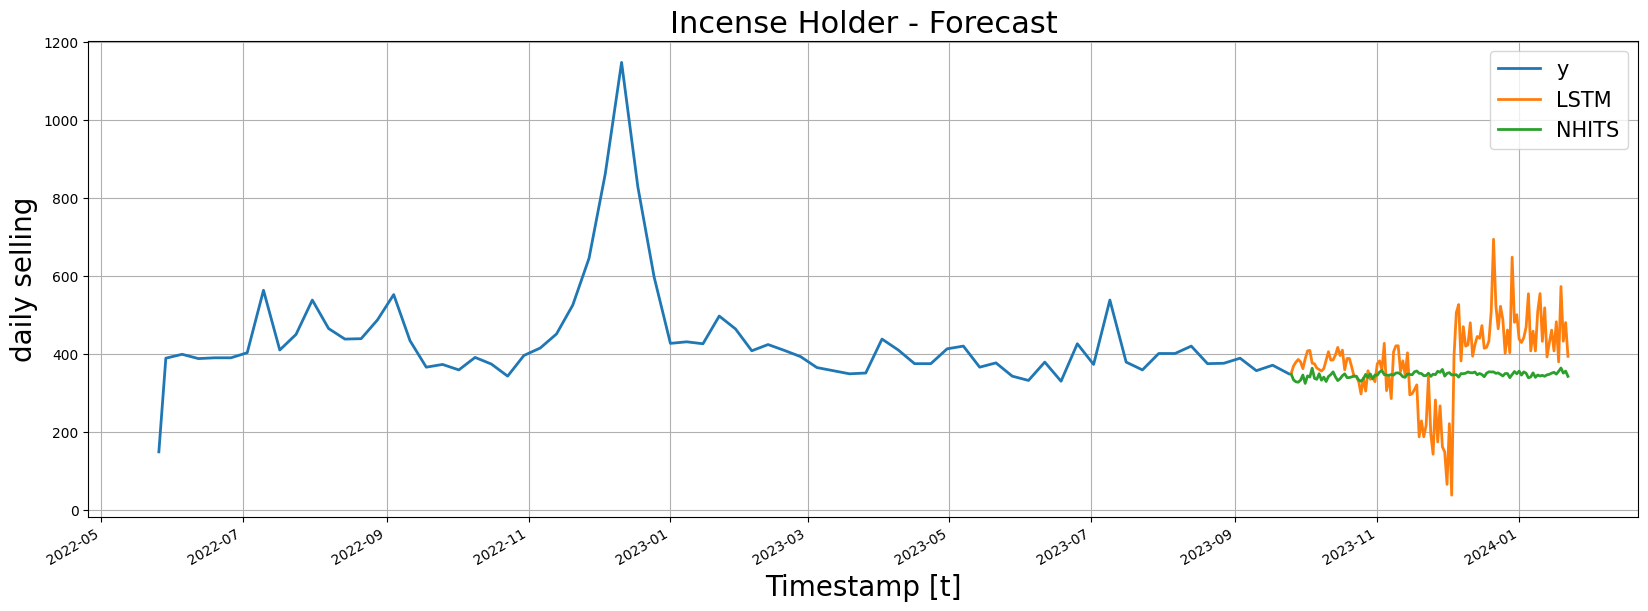

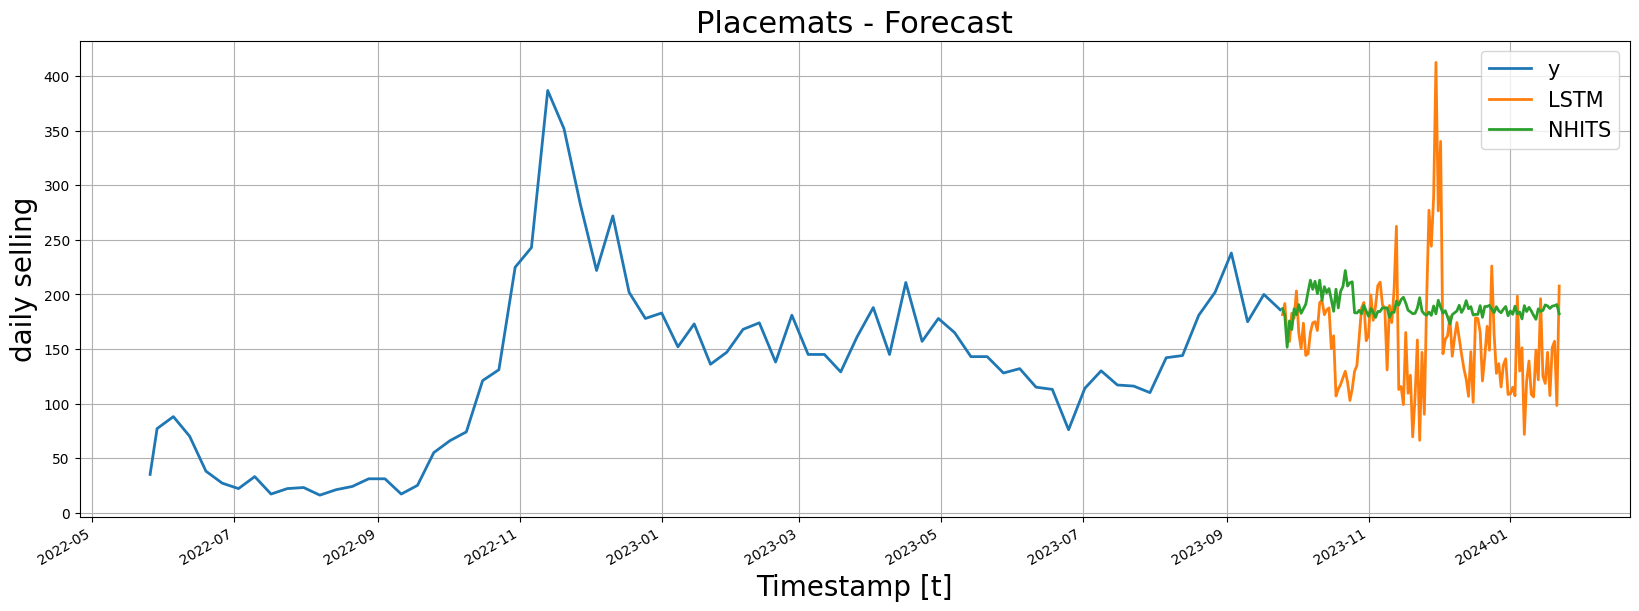

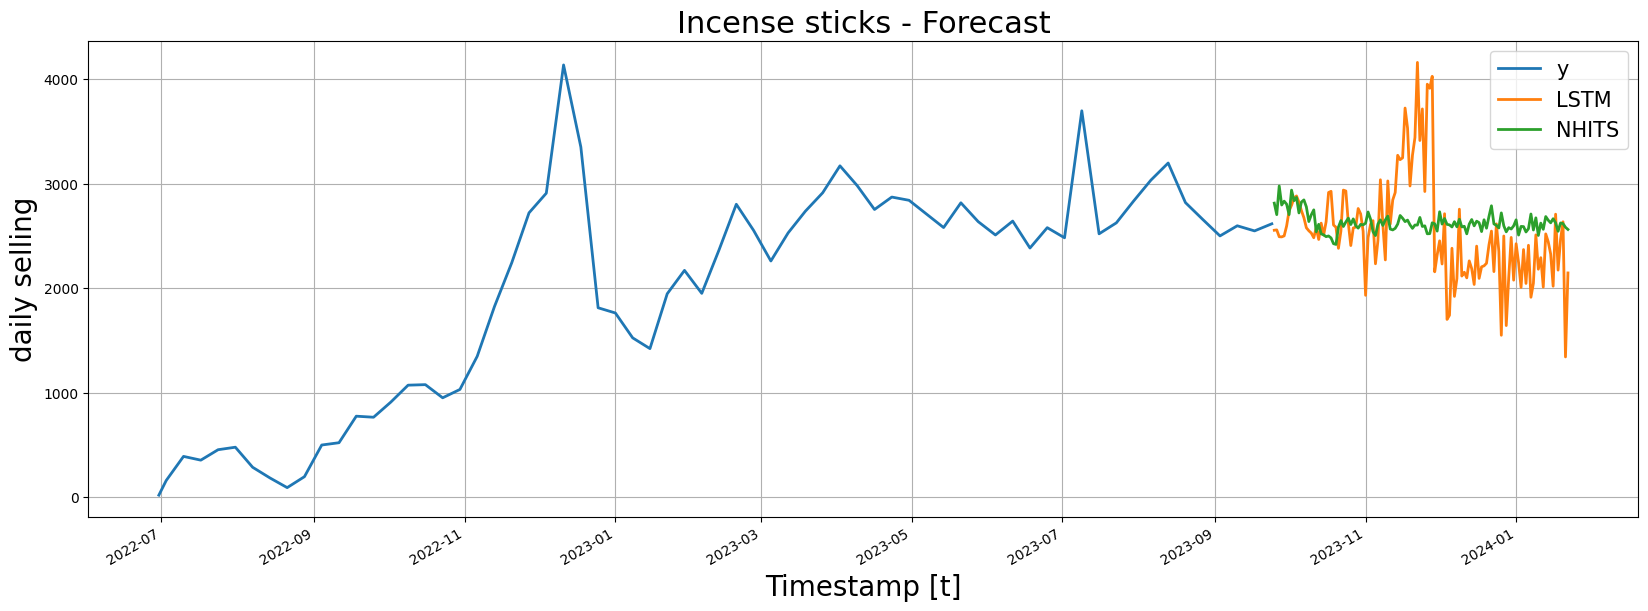

In [ ]:
for i in all_new_cat:
    horizon = 120
    # Try different hyperparmeters to improve accuracy.
    models = [LSTM(h=horizon,                    # Forecast horizon
                max_steps=500,                # Number of steps to train
                scaler_type='standard',       # Type of scaler to normalize data
                encoder_hidden_size=64,       # Defines the size of the hidden state of the LSTM
                decoder_hidden_size=64,),     # Defines the number of hidden units of each layer of the MLP decoder
            NHITS(h=horizon,                   # Forecast horizon
                    input_size = 40,      # Length of input sequence
                    max_steps=500,               # Number of steps to train
                    n_freq_downsample=[2, 1, 1]) # Downsampling factors for each stack output
            ]
    cur_cat_df_new = category_wise_df_new[category_wise_df_new['unique_id'] == i]

    nf = NeuralForecast(models=models, freq='D')
    nf.fit(df=cur_cat_df_new)
    Y_hat_df = nf.predict()
    Y_hat_df = Y_hat_df.reset_index()
    fig, ax = plt.subplots(1, 1, figsize = (20, 7))
    plot_df = pd.concat([cur_cat_df_new, Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
    plot_df[['y', 'LSTM', 'NHITS']].plot(ax=ax, linewidth=2)

    ax.set_title(f'{i} - Forecast', fontsize=22)
    ax.set_ylabel('daily selling', fontsize=20)
    ax.set_xlabel('Timestamp [t]', fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid()